<a href="https://colab.research.google.com/github/Pun2501/Food-Allergen-Detector/blob/main/Allergen_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets transformers torch Pillow matplotlib pytesseract
!sudo apt install tesseract-ocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from PIL import Image
import pytesseract

In [ ]:
ds = load_dataset("raphael0202/ingredient-detection-layout-dataset")
print(ds)  # Check dataset structure

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/984 [00:00<?, ?B/s]

(…)-00000-of-00005-0ff03b02085f498e.parquet:   0%|          | 0.00/378M [00:00<?, ?B/s]

(…)-00001-of-00005-acad356f75eea965.parquet:   0%|          | 0.00/399M [00:00<?, ?B/s]

(…)-00002-of-00005-8516c14d804b088d.parquet:   0%|          | 0.00/361M [00:00<?, ?B/s]

(…)-00003-of-00005-833cb180a43a4d55.parquet:   0%|          | 0.00/391M [00:00<?, ?B/s]

(…)-00004-of-00005-1750be0a4afccc8a.parquet:   0%|          | 0.00/502M [00:00<?, ?B/s]

(…)-00000-of-00001-04a40c2a6ed65a10.parquet:   0%|          | 0.00/241M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5065 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/556 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['ner_tags', 'words', 'bboxes', 'image', 'text', 'offsets', 'meta'],
        num_rows: 5065
    })
    test: Dataset({
        features: ['ner_tags', 'words', 'bboxes', 'image', 'text', 'offsets', 'meta'],
        num_rows: 556
    })
})


In [ ]:
from datasets import load_dataset

# Load the dataset
ds = load_dataset("raphael0202/ingredient-detection-layout-dataset")

# Check the structure of the train split
print(ds['train'].features)

{'ner_tags': Sequence(feature=ClassLabel(names=['O', 'B-ING', 'I-ING'], id=None), length=-1, id=None), 'words': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'bboxes': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None), 'image': Image(mode=None, decode=True, id=None), 'text': Value(dtype='string', id=None), 'offsets': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None), 'meta': {'barcode': Value(dtype='string', id=None), 'image_id': Value(dtype='string', id=None), 'url': Value(dtype='string', id=None), 'id': Value(dtype='string', id=None), 'in_test_split': Value(dtype='bool', id=None)}}


# Exploratory Data Analysis

In [ ]:
# Inspect the first sample
print(ds["train"][0])

{'ner_tags': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0], 'words': ['Ossau ', 'Iraty ', 'AOP ', '- ', 'Fromage ', 'au ', 'lait ', 'pasteurisé ', 'de ', 'brebis ', 'Ingrédients ', ': ', 'Lait ', 'pasteurisé ', 'de ', 'brebis', ', ', 'sel', ', ', 'présure', ', ', 'ferments ', 'lactiques ', 'et ', "d'affinage", '.\n'], 'bboxes': [[632, 53, 823, 148], [642, 159, 828, 229], [651, 237, 833, 310], [661, 322, 838, 335], [661, 345, 857, 483], [676, 494, 862, 530], [681, 544, 862, 592], [686, 601, 882, 770], [705, 784, 892, 820], [710, 833, 901, 930], [303, 55, 504, 227], [318, 240, 500, 250], [323, 264, 509, 325], [328, 336, 524, 496], [343, 508, 529, 545], [343, 559, 539, 658], [352, 661, 534, 668], [352, 680, 544, 726], [357, 730, 539, 736], [357, 749, 553, 871], [372, 873, 553, 880], [24, 53, 200, 189], [29, 202, 205, 347], [39, 360, 205, 386], [39, 395, 215, 550], [49, 552, 215, 560]], 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=204x120

Visualizing Data

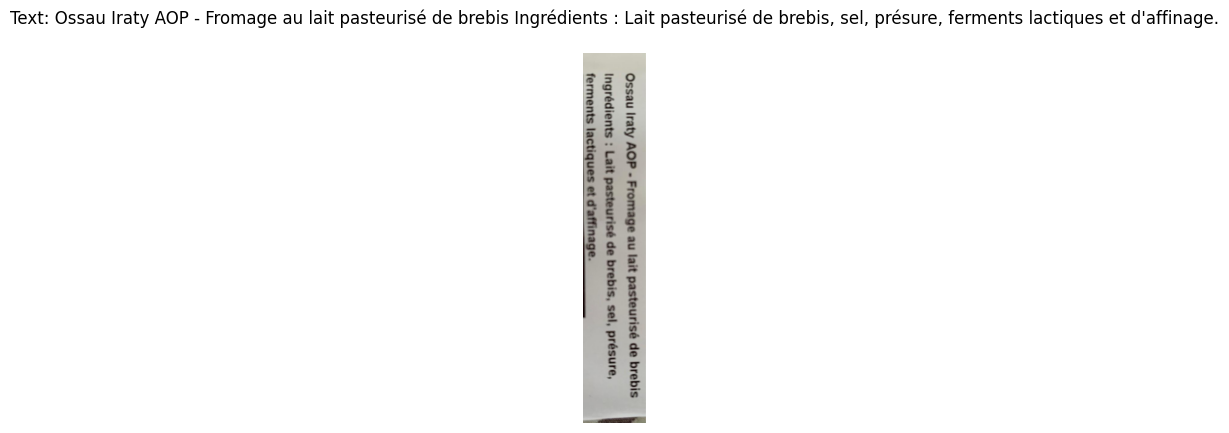

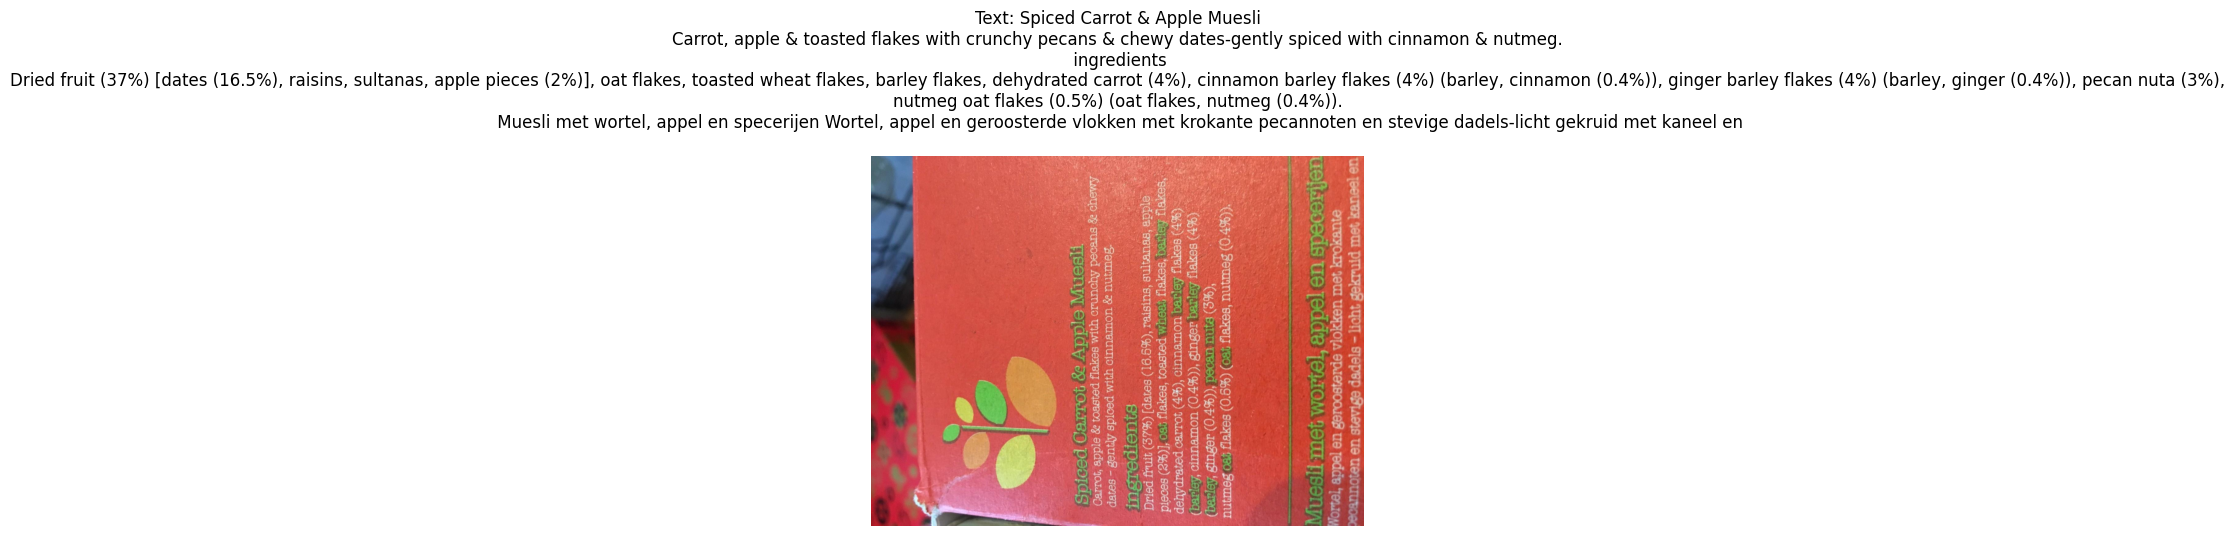

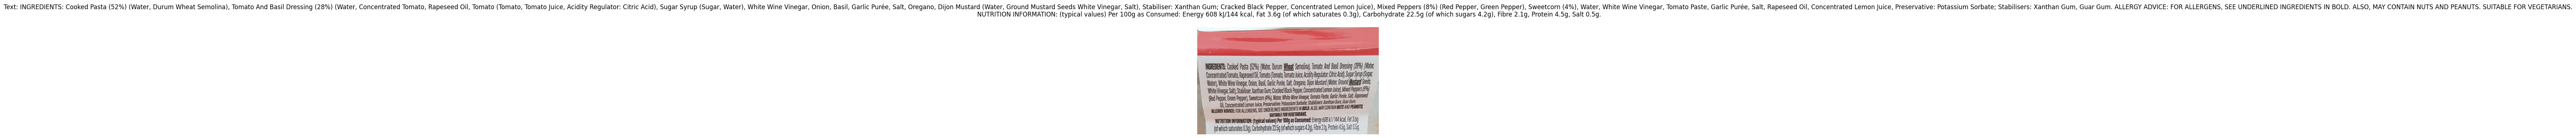

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Visualize a few random images from the dataset
for i in range(3):  # Displaying 3 random images
    image_path = ds["train"][i]["image"]
    img = image_path # Directly assign image_path to img, it's already a PIL Image object
    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Text: {ds['train'][i]['text']}")
    plt.show()

Keys in sample: dict_keys(['ner_tags', 'words', 'bboxes', 'image', 'text', 'offsets', 'meta'])


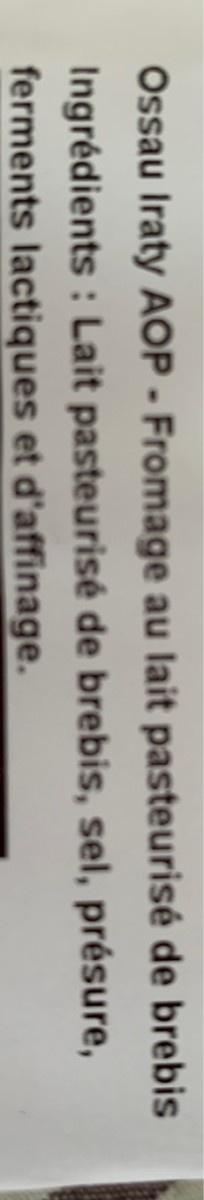

Ossau Iraty AOP - Fromage au lait pasteurisé de brebis
Ingrédients : Lait pasteurisé de brebis, sel, présure,
ferments lactiques et d'affi .

Annotations: No annotations


In [ ]:
# View sample entry
sample = ds["train"][0]
print("Keys in sample:", sample.keys())

# Check if images need OCR processing
if "image" in sample:
    display(sample["image"])  # Show image
    print(pytesseract.image_to_string(sample["image"]))  # OCR test

# Check annotations
print("Annotations:", sample.get("annotations", "No annotations"))

Check the Distribution of Ingredients

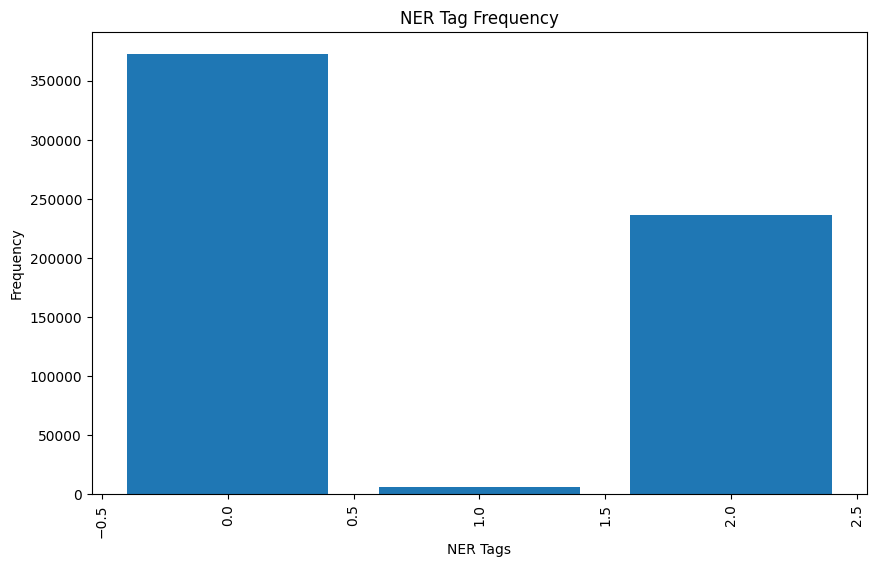

In [ ]:
from collections import Counter

# Flatten ner_tags and count the occurrence of each tag
ner_tags = [tag for sample in ds["train"] for tag in sample["ner_tags"]]
tag_counts = Counter(ner_tags)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(tag_counts.keys(), tag_counts.values())
plt.xticks(rotation=90)
plt.xlabel("NER Tags")
plt.ylabel("Frequency")
plt.title("NER Tag Frequency")
plt.show()

Text Length Analysis

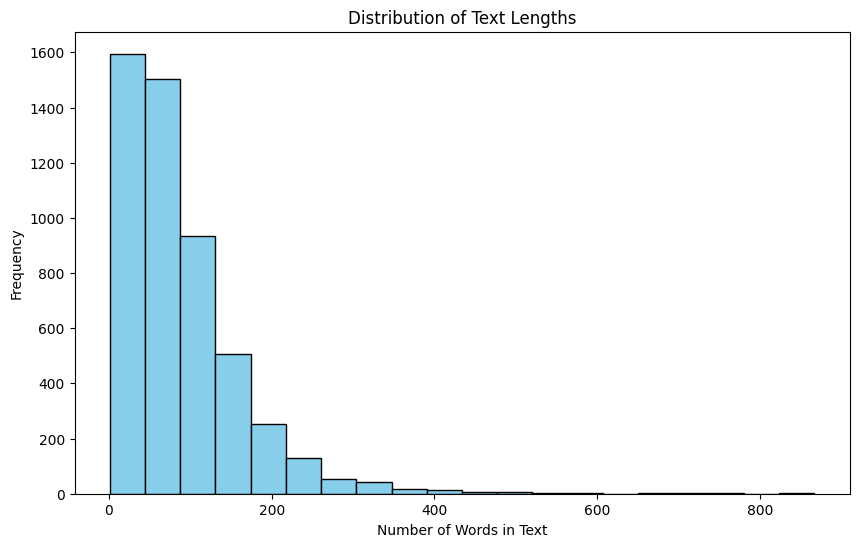

In [ ]:
# Calculate text lengths
text_lengths = [len(sample['text'].split()) for sample in ds['train']]

plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Number of Words in Text")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths")
plt.show()

# Data Preprocessing

Text Preprocessing

In [ ]:
import re

def clean_text(text):
    # Basic text preprocessing lowercasing and removing non-alphanumeric characters
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text

# Apply preprocessing
ds = ds.map(lambda x: {'cleaned_text': clean_text(x['text'])})

Map:   0%|          | 0/5065 [00:00<?, ? examples/s]

Map:   0%|          | 0/556 [00:00<?, ? examples/s]

In [ ]:
!pip install torch torchvision transformers datasets

In [ ]:
import torch
from datasets import load_dataset
from transformers import MobileBertTokenizer, MobileBertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import numpy as np
import os

# Load the dataset
ds = load_dataset("raphael0202/ingredient-detection-layout-dataset")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
# Check the first few text samples in the dataset
print(ds['train']['text'][:5])

["Ossau Iraty AOP - Fromage au lait pasteurisé de brebis Ingrédients : Lait pasteurisé de brebis, sel, présure, ferments lactiques et d'affinage.\n", 'Spiced Carrot & Apple Muesli\nCarrot, apple & toasted flakes with crunchy pecans & chewy dates-gently spiced with cinnamon & nutmeg.\n ingredients\nDried fruit (37%) [dates (16.5%), raisins, sultanas, apple pieces (2%)], oat flakes, toasted wheat flakes, barley flakes, dehydrated carrot (4%), cinnamon barley flakes (4%) (barley, cinnamon (0.4%)), ginger barley flakes (4%) (barley, ginger (0.4%)), pecan nuta (3%),\nnutmeg oat flakes (0.5%) (oat flakes, nutmeg (0.4%)).\n Muesli met wortel, appel en specerijen Wortel, appel en geroosterde vlokken met krokante pecannoten en stevige dadels-licht gekruid met kaneel en\n', 'INGREDIENTS: Cooked Pasta (52%) (Water, Durum Wheat Semolina), Tomato And Basil Dressing (28%) (Water, Concentrated Tomato, Rapeseed Oil, Tomato (Tomato, Tomato Juice, Acidity Regulator: Citric Acid), Sugar Syrup (Sugar, Wat

In [ ]:
pip install fasttext

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os
import shutil
import torch
from datasets import load_dataset, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

# --- Google Drive Paths ---
GDRIVE_PATH = "/content/drive/MyDrive/allergen_detection"
TOKENIZER_PATH = f"{GDRIVE_PATH}/tokenizer"
MODEL_PATH = f"{GDRIVE_PATH}/model"
CHECKPOINT_PATH = f"{GDRIVE_PATH}/checkpoints"

# Create directories if not exists
os.makedirs(GDRIVE_PATH, exist_ok=True)
os.makedirs(TOKENIZER_PATH, exist_ok=True)
os.makedirs(MODEL_PATH, exist_ok=True)
os.makedirs(CHECKPOINT_PATH, exist_ok=True)

# --- Configuration ---
ALLERGENS = [
    # --- Major Regulatory Allergens (FDA/WHO/EU) ---
    "Milk", "Eggs", "Peanuts", "Tree Nuts", "Soy", "Wheat",
    "Fish", "Shellfish", "Sesame", "Mustard", "Celery",
    "Lupin", "Molluscs", "Sulphur Dioxide", "Gluten",

    # --- Tree Nuts (Expanded) ---
    "Almonds", "Cashews", "Pistachios", "Walnuts", "Pecans",
    "Hazelnuts", "Macadamia", "Brazil Nuts", "Pine Nuts",
    "Chestnuts", "Beechnuts", "Ginkgo Nuts", "Hickory Nuts",
    "Licorice Nuts", "Nangai Nuts", "Shea Nuts",

    # --- Fish Species ---
    "Anchovy", "Basa", "Bass", "Catfish", "Cod", "Flounder",
    "Grouper", "Haddock", "Hake", "Halibut", "Herring", "Mackerel",
    "Mahi Mahi", "Perch", "Pike", "Pollock", "Salmon", "Sardines",
    "Snapper", "Sole", "Swordfish", "Tilapia", "Trout", "Tuna",
    "Whitefish",

    # --- Shellfish/Crustaceans ---
    "Shrimp", "Prawns", "Crab", "Lobster", "Crayfish", "Scallops",
    "Clams", "Mussels", "Oysters", "Abalone", "Cockles", "Whelk",
    "Periwinkle", "Sea Urchin", "Barnacle", "Krill", "Octopus",
    "Squid", "Cuttlefish",

    # --- Grain Allergens ---
    "Barley", "Rye", "Oats", "Spelt", "Kamut", "Triticale", "Durum",
    "Einkorn", "Emmer", "Farro", "Semolina", "Couscous", "Bulgur",
    "Malt", "Brewer's Yeast",

    # --- Legume Allergens ---
    "Lentils", "Chickpeas", "Peas", "Green Beans", "Lima Beans",
    "Kidney Beans", "Black Beans", "Pinto Beans", "Navy Beans",
    "Soybeans", "Peanuts", "Lupin", "Tamari", "Edamame", "Tempeh",
    "Natto", "Miso",

    # --- Seed Allergens ---
    "Sunflower Seeds", "Pumpkin Seeds", "Chia Seeds", "Flax Seeds",
    "Hemp Seeds", "Poppy Seeds", "Cottonseed", "Rapeseed", "Canola",

    # --- Fruit Allergens ---
    "Kiwi", "Mango", "Banana", "Avocado", "Strawberry", "Citrus",
    "Apple", "Peach", "Cherry", "Grape", "Melon", "Tomato", "Papaya",
    "Pineapple", "Passion Fruit", "Jackfruit", "Lychee", "Guava",

    # --- Vegetable Allergens ---
    "Celery", "Carrot", "Bell Pepper", "Chili Pepper", "Garlic",
    "Onion", "Asparagus", "Broccoli", "Cabbage", "Cauliflower",
    "Spinach", "Artichoke", "Beetroot", "Eggplant", "Zucchini",

    # --- Spice Allergens ---
    "Cumin", "Coriander", "Fennel", "Paprika", "Turmeric", "Cinnamon",
    "Cloves", "Nutmeg", "Mustard", "Pepper", "Vanilla", "Saffron",
    "Anise", "Cardamom", "Sumac", "Wasabi", "Horseradish",

    # --- Additives/Preservatives ---
    "Sulfites", "Benzoates", "Nitrates", "MSG", "Tartrazine",
    "Carmine", "Annatto", "Aspartame", "Saccharin", "BHA/BHT",
    "Sorbic Acid", "Propylene Glycol", "Gelatin", "Shellac",
    "Casein", "Whey", "Lactose", "Gluten",

    # --- Regional Allergens ---
    "Buckwheat", "Quinoa", "Amaranth", "Teff", "Sorghum", "Millet",
    "Job's Tears", "Lingonberry", "Cloudberry", "Ackee", "Breadfruit",
    "Durian", "Rambutan", "Salak", "Soursop", "Star Apple",

    # --- Meat Allergens ---
    "Beef", "Pork", "Chicken", "Turkey", "Lamb", "Venison", "Goat",
    "Rabbit", "Duck", "Goose", "Kangaroo", "Bison", "Wild Boar",

    # --- Dairy Derivatives ---
    "Caseinate", "Lactalbumin", "Lactoglobulin", "Ghee", "Curd",
    "Galactose", "Dulce de Leche", "Paneer", "Recaldent",

    # --- Plant-Based Alternatives ---
    "Almond Milk", "Soy Milk", "Oat Milk", "Coconut Milk", "Hemp Milk",
    "Quorn", "Seitan", "Tofu", "Textured Vegetable Protein",

    # --- Insect Derivatives ---
    "Cochineal", "Carmine", "Shellac", "Cricket Flour", "Mealworm Protein",

    # --- Alcohol Components ---
    "Histamines", "Tannins", "Sulfites", "Fusel Oils", "Peptones",

    # --- Pet Food Cross-Allergens ---
    "Horse Meat", "Salmon Meal", "Poultry By-Products", "Animal Digest",

    # --- Pediatric Allergens ---
    "Cow's Milk Protein", "Lactoglobulin", "Alpha-Lactalbumin", "Bovine Serum Albumin",

    # --- Cross-Reactive Allergens ---
    "Latex-Fruit Proteins", "Birch Pollen-Related", "Ragweed-Related",

    # --- Emerging Allergens ---
    "Algal Protein", "Mung Bean", "Water Caltrop", "Airborne Yeast",
    "Microbial Rennet", "Lab-Grown Protein"
]


ALLERGEN_SYNONYMS = {
    # --- Major Regulatory Allergens ---
    "Milk": ["casein", "whey", "lactose", "ghee", "curd", "galactose", "recadent", "dairy", "milk solids"],
    "Eggs": ["ovalbumin", "ovomucoid", "livetin", "albumen", "lysozyme", "egg white", "egg yolk", "egg powder"],
    "Peanuts": ["arachis hypogaea", "groundnuts", "monkey nuts", "goobers", "beer nuts", "earth nuts"],
    "Tree Nuts": ["hard nuts", "botanical nuts", "culinary nuts", "edible seeds"],
    "Soy": ["glycine max", "soya", "edamame", "tempeh", "natto", "yuba", "soy protein", "soy lecithin"],
    "Wheat": ["triticum aestivum", "bulgur", "farina", "graham flour", "wheat gluten", "wheat starch"],
    "Fish": ["pisces", "elasmobranchii", "osteichthyes", "fish oil", "fish sauce", "fish paste"],
    "Shellfish": ["crustacea", "mollusca", "cephalopoda", "bivalvia", "seafood", "marine arthropods"],
    "Sesame": ["sesamum indicum", "benne seed", "gingelly", "til", "simsim"],
    "Mustard": ["sinapis alba", "brassica juncea", "yellow powder", "mustard oil", "mustard greens"],
    "Celery": ["apium graveolens", "celeriac", "celery salt", "celery seed", "celery root"],
    "Lupin": ["lupinus", "lupine bean", "altramuz", "lupin flour", "lupin protein"],
    "Molluscs": ["gastropoda", "bivalvia", "cephalopoda", "escargot", "periwinkle"],
    "Sulphur Dioxide": ["e220", "sulfiting agents", "sulfur dioxide", "sulfites", "sulfurous acid"],
    "Gluten": ["gliadin", "glutenin", "secalin", "hordein", "wheat protein"],

    # --- Tree Nuts ---
    "Almonds": ["prunus dulcis", "badam", "almond milk", "almond oil", "marzipan"],
    "Cashews": ["anacardium occidentale", "caju", "cashew apple", "cashew butter"],
    "Pistachios": ["pistacia vera", "pista", "green almond", "smiling nut"],
    "Walnuts": ["juglans regia", "akhrot", "english walnut", "persian walnut"],
    "Pecans": ["carya illinoinensis", "pecan pie", "pecan oil", "native nut"],
    "Hazelnuts": ["corylus", "filbert", "cobnut", "hazel", "nutella"],
    "Macadamia": ["macadamia integrifolia", "queensland nut", "bush nut", "bauple nut"],
    "Brazil Nuts": ["bertholletia excelsa", "para nuts", "amazon nuts", "cream nuts"],
    "Pine Nuts": ["pignoli", "piñon", "cedar nuts", "stone pine seeds"],
    "Chestnuts": ["castanea", "châtaigne", "marron", "water chestnut"],
    "Beechnuts": ["fagus", "beech mast", "beech tree nuts"],
    "Ginkgo Nuts": ["ginkgo biloba", "silver apricot", "maidenhair tree nut"],
    "Hickory Nuts": ["carya", "shagbark", "pignut", "bitternut"],
    "Licorice Nuts": ["abrus precatorius", "jequirity bean", "rosary pea"],
    "Shea Nuts": ["vitellaria paradoxa", "karite", "shea butter"],

    # --- Fish Species ---
    "Anchovy": ["engraulis", "anchoa", "fish sauce", "bagoong"],
    "Basa": ["pangasius bocourti", "swai", "tra", "vietnamese catfish"],
    "Cod": ["gadus", "scrod", "saltfish", "bacalao"],
    "Salmon": ["salmo salar", "smoked salmon", "lox", "gravlax"],
    "Tuna": ["thunnus", "ahi", "albacore", "bonito", "tonno"],

    # --- Shellfish ---
    "Shrimp": ["caridea", "prawn", "krill", "scampi", "ebi"],
    "Crab": ["brachyura", "soft-shell crab", "crab paste", "kani"],
    "Lobster": ["homarus", "langouste", "rock lobster", "bisque"],
    "Octopus": ["octopoda", "tako", "pulpo", "moscardino"],
    "Squid": ["teuthida", "calamari", "ika", "chipirones"],

    # --- Grains ---
    "Barley": ["hordeum vulgare", "malt", "barley malt", "pearl barley"],
    "Rye": ["secale cereale", "rye flour", "rye bread", "pumpernickel"],
    "Oats": ["avena sativa", "oatmeal", "rolled oats", "oat bran"],
    "Spelt": ["triticum spelta", "dinkel", "farro grande", "hulled wheat"],

    # --- Legumes ---
    "Lentils": ["lens culinaris", "masoor", "red lentil", "puy lentil"],
    "Chickpeas": ["cicer arietinum", "garbanzo", "chana", "hummus"],
    "Peas": ["pisum sativum", "green peas", "split peas", "mangetout"],


    # --- Additives ---
    "MSG": ["monosodium glutamate", "e621", "ajinomoto", "umami seasoning"],
    "Carmine": ["cochineal", "e120", "natural red 4", "carminic acid"],
    "Aspartame": ["nutrasweet", "e951", "equal", "canderel"],

    # --- Regional Allergens ---
    "Durian": ["king of fruits", "civet fruit", "stink fruit"],
    "Ackee": ["blighia sapida", "akee", "vegetable brain", "national fruit jamaica"],

    # --- Emerging Allergens ---
    "Cricket Flour": ["insect protein", "orthoptera powder", "entomophagy product"],
    "Lab-Grown Protein": ["cultured meat", "in vitro protein", "cellular agriculture"]
}

# --- Helper Functions ---
def generate_labels(text):
    """Efficient label generation using existing text"""
    text = text.lower()
    return [
        # Convert to float32 for PyTorch compatibility
        float(any(syn in text for syn in [allergen.lower()] + ALLERGEN_SYNONYMS.get(allergen, [])))
        for allergen in ALLERGENS
    ]

# --- Dataset Processing ---
def process_dataset(dataset):
    """Process dataset using existing text fields"""
    return Dataset.from_dict({
        "text": [ex["text"] for ex in dataset],
        # Convert labels to float32
        "labels": [generate_labels(ex["text"]) for ex in dataset]
    }).filter(lambda x: x["text"] != "").with_format("torch")

# --- Main Workflow ---
def main():
    # 1. Load Dataset
    dataset = load_dataset("raphael0202/ingredient-detection-layout-dataset")

    # 2. Process Data
    processed_ds = process_dataset(dataset["train"])

    # 3. Train/Test Split
    split_ds = processed_ds.train_test_split(test_size=0.2)

    # 4. Tokenizer Setup
    if os.listdir(TOKENIZER_PATH):
        tokenizer = BertTokenizer.from_pretrained(TOKENIZER_PATH)
    else:
        tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
        tokenizer.save_pretrained(TOKENIZER_PATH)

    # 5. Tokenization with proper dtype
    def tokenize_fn(examples):
        return tokenizer(
            examples["text"],
            padding="max_length",
            truncation=True,
            max_length=128,
            return_tensors="pt"
        )

    tokenized_ds = split_ds.map(tokenize_fn, batched=True)

    # 6. Model Initialization with correct dtype
    if os.listdir(CHECKPOINT_PATH):
        model = BertForSequenceClassification.from_pretrained(CHECKPOINT_PATH)
    else:
        model = BertForSequenceClassification.from_pretrained(
            "bert-base-uncased",
            num_labels=len(ALLERGENS),
            problem_type="multi_label_classification",
            torch_dtype=torch.float32
        )

    # 7. Training Setup with correct types
    training_args = TrainingArguments(
        output_dir=CHECKPOINT_PATH,
        eval_strategy="epoch",
        save_strategy="epoch",
        save_total_limit=1,
        learning_rate=2e-5,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir=f"{GDRIVE_PATH}/logs",
        report_to="none",
        remove_unused_columns=True,
        optim="adamw_torch",
        fp16=False  # Disable mixed precision for type stability
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_ds["train"],
        eval_dataset=tokenized_ds["test"],
        tokenizer=tokenizer,
    )

    # 8. Train with Cleanup
    try:
        trainer.train(resume_from_checkpoint=bool(os.listdir(CHECKPOINT_PATH)))
    finally:
        # Save final model
        trainer.save_model(MODEL_PATH)
        tokenizer.save_pretrained(MODEL_PATH)

        # Cleanup checkpoints
        shutil.rmtree(CHECKPOINT_PATH)
        os.makedirs(CHECKPOINT_PATH, exist_ok=True)

        # Free memory
        del model, trainer, tokenizer, tokenized_ds
        torch.cuda.empty_cache()

if __name__ == "__main__":
    main()

# --- Inference Function ---
def predict_from_text(text):
    """Direct prediction from text input"""
    # Load from Google Drive
    tokenizer = BertTokenizer.from_pretrained(MODEL_PATH)
    model = BertForSequenceClassification.from_pretrained(MODEL_PATH)

    # Predict with proper dtype
    inputs = tokenizer(text, return_tensors="pt", truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)

    # Cleanup
    del model, tokenizer
    torch.cuda.empty_cache()

    return [
        (ALLERGENS[i], float(torch.sigmoid(outputs.logits)[0][i]))
        for i in torch.topk(outputs.logits, 5).indices[0].tolist()
    ]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Filter:   0%|          | 0/5065 [00:00<?, ? examples/s]

Map:   0%|          | 0/4052 [00:00<?, ? examples/s]

Map:   0%|          | 0/1013 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-4-aae298696148>:276: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.170600,0.057360
2,0.050400,0.045728
3,0.044800,0.043937


In [ ]:
# Standalone Evaluation Code with Drive Persistence
from google.colab import drive
drive.mount('/content/drive')

import torch
import os
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset, Dataset, load_from_disk

# --- Configuration ---
GDRIVE_PATH = "/content/drive/MyDrive/allergen_detection"
MODEL_PATH = f"{GDRIVE_PATH}/model"
DATA_PATH = f"{GDRIVE_PATH}/evaluation_data"
os.makedirs(DATA_PATH, exist_ok=True)

# --- Persistent Storage Files ---
TOKENIZED_PATH = f"{DATA_PATH}/tokenized"
LABELS_PATH = f"{DATA_PATH}/labels.pt"
ALLERGENS_PATH = f"{DATA_PATH}/allergens.txt"
SYNONYMS_PATH = f"{DATA_PATH}/synonyms.pt"

def save_components():
    """Save labels and synonyms to Drive"""
    torch.save({
        'ALLERGENS': ALLERGENS,
        'ALLERGEN_SYNONYMS': ALLERGEN_SYNONYMS
    }, SYNONYMS_PATH)

    with open(ALLERGENS_PATH, "w") as f:
        f.write("\n".join(ALLERGENS))

def load_components():
    """Load components from Drive or create new"""
    if os.path.exists(SYNONYMS_PATH):
        data = torch.load(SYNONYMS_PATH)
        return data['ALLERGENS'], data['ALLERGEN_SYNONYMS']

    # Define your original lists here
    ALLERGENS = [
        # --- Major Regulatory Allergens (FDA/WHO/EU) ---
    "Milk", "Eggs", "Peanuts", "Tree Nuts", "Soy", "Wheat",
    "Fish", "Shellfish", "Sesame", "Mustard", "Celery",
    "Lupin", "Molluscs", "Sulphur Dioxide", "Gluten",

    # --- Tree Nuts (Expanded) ---
    "Almonds", "Cashews", "Pistachios", "Walnuts", "Pecans",
    "Hazelnuts", "Macadamia", "Brazil Nuts", "Pine Nuts",
    "Chestnuts", "Beechnuts", "Ginkgo Nuts", "Hickory Nuts",
    "Licorice Nuts", "Nangai Nuts", "Shea Nuts",

    # --- Fish Species ---
    "Anchovy", "Basa", "Bass", "Catfish", "Cod", "Flounder",
    "Grouper", "Haddock", "Hake", "Halibut", "Herring", "Mackerel",
    "Mahi Mahi", "Perch", "Pike", "Pollock", "Salmon", "Sardines",
    "Snapper", "Sole", "Swordfish", "Tilapia", "Trout", "Tuna",
    "Whitefish",

    # --- Shellfish/Crustaceans ---
    "Shrimp", "Prawns", "Crab", "Lobster", "Crayfish", "Scallops",
    "Clams", "Mussels", "Oysters", "Abalone", "Cockles", "Whelk",
    "Periwinkle", "Sea Urchin", "Barnacle", "Krill", "Octopus",
    "Squid", "Cuttlefish",

    # --- Grain Allergens ---
    "Barley", "Rye", "Oats", "Spelt", "Kamut", "Triticale", "Durum",
    "Einkorn", "Emmer", "Farro", "Semolina", "Couscous", "Bulgur",
    "Malt", "Brewer's Yeast",

    # --- Legume Allergens ---
    "Lentils", "Chickpeas", "Peas", "Green Beans", "Lima Beans",
    "Kidney Beans", "Black Beans", "Pinto Beans", "Navy Beans",
    "Soybeans", "Peanuts", "Lupin", "Tamari", "Edamame", "Tempeh",
    "Natto", "Miso",

    # --- Seed Allergens ---
    "Sunflower Seeds", "Pumpkin Seeds", "Chia Seeds", "Flax Seeds",
    "Hemp Seeds", "Poppy Seeds", "Cottonseed", "Rapeseed", "Canola",

    # --- Fruit Allergens ---
    "Kiwi", "Mango", "Banana", "Avocado", "Strawberry", "Citrus",
    "Apple", "Peach", "Cherry", "Grape", "Melon", "Tomato", "Papaya",
    "Pineapple", "Passion Fruit", "Jackfruit", "Lychee", "Guava",

    # --- Vegetable Allergens ---
    "Celery", "Carrot", "Bell Pepper", "Chili Pepper", "Garlic",
    "Onion", "Asparagus", "Broccoli", "Cabbage", "Cauliflower",
    "Spinach", "Artichoke", "Beetroot", "Eggplant", "Zucchini",

    # --- Spice Allergens ---
    "Cumin", "Coriander", "Fennel", "Paprika", "Turmeric", "Cinnamon",
    "Cloves", "Nutmeg", "Mustard", "Pepper", "Vanilla", "Saffron",
    "Anise", "Cardamom", "Sumac", "Wasabi", "Horseradish",

    # --- Additives/Preservatives ---
    "Sulfites", "Benzoates", "Nitrates", "MSG", "Tartrazine",
    "Carmine", "Annatto", "Aspartame", "Saccharin", "BHA/BHT",
    "Sorbic Acid", "Propylene Glycol", "Gelatin", "Shellac",
    "Casein", "Whey", "Lactose", "Gluten",

    # --- Regional Allergens ---
    "Buckwheat", "Quinoa", "Amaranth", "Teff", "Sorghum", "Millet",
    "Job's Tears", "Lingonberry", "Cloudberry", "Ackee", "Breadfruit",
    "Durian", "Rambutan", "Salak", "Soursop", "Star Apple",

    # --- Meat Allergens ---
    "Beef", "Pork", "Chicken", "Turkey", "Lamb", "Venison", "Goat",
    "Rabbit", "Duck", "Goose", "Kangaroo", "Bison", "Wild Boar",

    # --- Dairy Derivatives ---
    "Caseinate", "Lactalbumin", "Lactoglobulin", "Ghee", "Curd",
    "Galactose", "Dulce de Leche", "Paneer", "Recaldent",

    # --- Plant-Based Alternatives ---
    "Almond Milk", "Soy Milk", "Oat Milk", "Coconut Milk", "Hemp Milk",
    "Quorn", "Seitan", "Tofu", "Textured Vegetable Protein",

    # --- Insect Derivatives ---
    "Cochineal", "Carmine", "Shellac", "Cricket Flour", "Mealworm Protein",

    # --- Alcohol Components ---
    "Histamines", "Tannins", "Sulfites", "Fusel Oils", "Peptones",

    # --- Pet Food Cross-Allergens ---
    "Horse Meat", "Salmon Meal", "Poultry By-Products", "Animal Digest",

    # --- Pediatric Allergens ---
    "Cow's Milk Protein", "Lactoglobulin", "Alpha-Lactalbumin", "Bovine Serum Albumin",

    # --- Cross-Reactive Allergens ---
    "Latex-Fruit Proteins", "Birch Pollen-Related", "Ragweed-Related",

    # --- Emerging Allergens ---
    "Algal Protein", "Mung Bean", "Water Caltrop", "Airborne Yeast",
    "Microbial Rennet", "Lab-Grown Protein"
    ]

    ALLERGEN_SYNONYMS = {
        # --- Major Regulatory Allergens ---
    "Milk": ["casein", "whey", "lactose", "ghee", "curd", "galactose", "recadent", "dairy", "milk solids"],
    "Eggs": ["ovalbumin", "ovomucoid", "livetin", "albumen", "lysozyme", "egg white", "egg yolk", "egg powder"],
    "Peanuts": ["arachis hypogaea", "groundnuts", "monkey nuts", "goobers", "beer nuts", "earth nuts"],
    "Tree Nuts": ["hard nuts", "botanical nuts", "culinary nuts", "edible seeds"],
    "Soy": ["glycine max", "soya", "edamame", "tempeh", "natto", "yuba", "soy protein", "soy lecithin"],
    "Wheat": ["triticum aestivum", "bulgur", "farina", "graham flour", "wheat gluten", "wheat starch"],
    "Fish": ["pisces", "elasmobranchii", "osteichthyes", "fish oil", "fish sauce", "fish paste"],
    "Shellfish": ["crustacea", "mollusca", "cephalopoda", "bivalvia", "seafood", "marine arthropods"],
    "Sesame": ["sesamum indicum", "benne seed", "gingelly", "til", "simsim"],
    "Mustard": ["sinapis alba", "brassica juncea", "yellow powder", "mustard oil", "mustard greens"],
    "Celery": ["apium graveolens", "celeriac", "celery salt", "celery seed", "celery root"],
    "Lupin": ["lupinus", "lupine bean", "altramuz", "lupin flour", "lupin protein"],
    "Molluscs": ["gastropoda", "bivalvia", "cephalopoda", "escargot", "periwinkle"],
    "Sulphur Dioxide": ["e220", "sulfiting agents", "sulfur dioxide", "sulfites", "sulfurous acid"],
    "Gluten": ["gliadin", "glutenin", "secalin", "hordein", "wheat protein"],

    # --- Tree Nuts ---
    "Almonds": ["prunus dulcis", "badam", "almond milk", "almond oil", "marzipan"],
    "Cashews": ["anacardium occidentale", "caju", "cashew apple", "cashew butter"],
    "Pistachios": ["pistacia vera", "pista", "green almond", "smiling nut"],
    "Walnuts": ["juglans regia", "akhrot", "english walnut", "persian walnut"],
    "Pecans": ["carya illinoinensis", "pecan pie", "pecan oil", "native nut"],
    "Hazelnuts": ["corylus", "filbert", "cobnut", "hazel", "nutella"],
    "Macadamia": ["macadamia integrifolia", "queensland nut", "bush nut", "bauple nut"],
    "Brazil Nuts": ["bertholletia excelsa", "para nuts", "amazon nuts", "cream nuts"],
    "Pine Nuts": ["pignoli", "piñon", "cedar nuts", "stone pine seeds"],
    "Chestnuts": ["castanea", "châtaigne", "marron", "water chestnut"],
    "Beechnuts": ["fagus", "beech mast", "beech tree nuts"],
    "Ginkgo Nuts": ["ginkgo biloba", "silver apricot", "maidenhair tree nut"],
    "Hickory Nuts": ["carya", "shagbark", "pignut", "bitternut"],
    "Licorice Nuts": ["abrus precatorius", "jequirity bean", "rosary pea"],
    "Shea Nuts": ["vitellaria paradoxa", "karite", "shea butter"],

    # --- Fish Species ---
    "Anchovy": ["engraulis", "anchoa", "fish sauce", "bagoong"],
    "Basa": ["pangasius bocourti", "swai", "tra", "vietnamese catfish"],
    "Cod": ["gadus", "scrod", "saltfish", "bacalao"],
    "Salmon": ["salmo salar", "smoked salmon", "lox", "gravlax"],
    "Tuna": ["thunnus", "ahi", "albacore", "bonito", "tonno"],

    # --- Shellfish ---
    "Shrimp": ["caridea", "prawn", "krill", "scampi", "ebi"],
    "Crab": ["brachyura", "soft-shell crab", "crab paste", "kani"],
    "Lobster": ["homarus", "langouste", "rock lobster", "bisque"],
    "Octopus": ["octopoda", "tako", "pulpo", "moscardino"],
    "Squid": ["teuthida", "calamari", "ika", "chipirones"],

    # --- Grains ---
    "Barley": ["hordeum vulgare", "malt", "barley malt", "pearl barley"],
    "Rye": ["secale cereale", "rye flour", "rye bread", "pumpernickel"],
    "Oats": ["avena sativa", "oatmeal", "rolled oats", "oat bran"],
    "Spelt": ["triticum spelta", "dinkel", "farro grande", "hulled wheat"],

    # --- Legumes ---
    "Lentils": ["lens culinaris", "masoor", "red lentil", "puy lentil"],
    "Chickpeas": ["cicer arietinum", "garbanzo", "chana", "hummus"],
    "Peas": ["pisum sativum", "green peas", "split peas", "mangetout"],


    # --- Additives ---
    "MSG": ["monosodium glutamate", "e621", "ajinomoto", "umami seasoning"],
    "Carmine": ["cochineal", "e120", "natural red 4", "carminic acid"],
    "Aspartame": ["nutrasweet", "e951", "equal", "canderel"],

    # --- Regional Allergens ---
    "Durian": ["king of fruits", "civet fruit", "stink fruit"],
    "Ackee": ["blighia sapida", "akee", "vegetable brain", "national fruit jamaica"],

    # --- Emerging Allergens ---
    "Cricket Flour": ["insect protein", "orthoptera powder", "entomophagy product"],
    "Lab-Grown Protein": ["cultured meat", "in vitro protein", "cellular agriculture"]
    }

    # Save for future sessions
    save_components()
    return ALLERGENS, ALLERGEN_SYNONYMS

def get_tokenized_data(tokenizer):
    """Load or create tokenized dataset"""
    if os.path.exists(TOKENIZED_PATH):
        return load_from_disk(TOKENIZED_PATH)

    # Process and save if not exists
    raw_data = load_dataset("raphael0202/ingredient-detection-layout-dataset")["train"]

    # Create dataset with existing text
    dataset = Dataset.from_dict({
        "text": [ex["text"] for ex in raw_data],
        "labels": [generate_labels(ex["text"]) for ex in raw_data]
    }).filter(lambda x: x["text"] != "")

    split_ds = dataset.train_test_split(test_size=0.2)

    # Tokenize
    def tokenize_fn(examples):
        return tokenizer(
            examples["text"],
            padding="max_length",
            truncation=True,
            max_length=128,
            return_tensors="pt"
        )

    tokenized = split_ds.map(tokenize_fn, batched=True)
    tokenized.save_to_disk(TOKENIZED_PATH)
    return tokenized

def generate_classification_report():
    """Generate and save evaluation report"""
    # Load components
    ALLERGENS, ALLERGEN_SYNONYMS = load_components()
    model = BertForSequenceClassification.from_pretrained(MODEL_PATH)
    tokenizer = BertTokenizer.from_pretrained(MODEL_PATH)

    # Get tokenized data
    tokenized_ds = get_tokenized_data(tokenizer)

    # Create trainer without logging
    trainer = Trainer(
        model=model,
        args=TrainingArguments(
            output_dir="./tmp",
            per_device_eval_batch_size=16,
            disable_tqdm=True,
            report_to="none"
        )
    )

    # Predict
    predictions = trainer.predict(tokenized_ds["test"])
    probs = torch.sigmoid(torch.Tensor(predictions.predictions))
    y_pred = (probs > 0.3).long().numpy()

    # Generate and save report
    report = classification_report(
        tokenized_ds["test"]["labels"],
        y_pred,
        target_names=ALLERGENS,
        zero_division=0
    )

    with open(f"{DATA_PATH}/classification_report.txt", "w") as f:
        f.write(report)

    print(report)
    torch.cuda.empty_cache()

if __name__ == "__main__":
    generate_classification_report()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Filter:   0%|          | 0/5065 [00:00<?, ? examples/s]

Map:   0%|          | 0/4052 [00:00<?, ? examples/s]

Map:   0%|          | 0/1013 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/4052 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1013 [00:00<?, ? examples/s]

                            precision    recall  f1-score   support

                      Milk       0.00      0.00      0.00       157
                      Eggs       0.00      0.00      0.00        27
                   Peanuts       0.00      0.00      0.00        28
                 Tree Nuts       0.00      0.00      0.00        17
                       Soy       0.00      0.00      0.00       115
                     Wheat       0.00      0.00      0.00       103
                      Fish       0.00      0.00      0.00        10
                 Shellfish       0.00      0.00      0.00         2
                    Sesame       0.00      0.00      0.00       127
                   Mustard       0.00      0.00      0.00        16
                    Celery       0.00      0.00      0.00         8
                     Lupin       0.00      0.00      0.00        12
                  Molluscs       0.00      0.00      0.00         1
           Sulphur Dioxide       0.00      0.00

In [ ]:
# Check label distribution
import numpy as np
from datasets import load_from_disk  # Import for loading from disk
from transformers import BertTokenizer # Import BertTokenizer

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained("/content/drive/MyDrive/allergen_detection/model")
TOKENIZED_PATH = "/content/drive/MyDrive/allergen_detection/evaluation_data/tokenized"

# Load the tokenized dataset from disk
tokenized_ds = load_from_disk(TOKENIZED_PATH)

# Access true labels from the test set
y_true = np.array(tokenized_ds["test"]["labels"])

label_counts = np.sum(y_true, axis=0)

# Load allergens
try:
  ALLERGENS
except NameError:
  with open("/content/drive/MyDrive/allergen_detection/evaluation_data/allergens.txt", "r") as f:
    ALLERGENS = f.read().splitlines()

for allergen, count in zip(ALLERGENS, label_counts):
    if count > 0:
        print(f"{allergen}: {count} samples")

Milk: 157.0 samples
Eggs: 27.0 samples
Peanuts: 28.0 samples
Tree Nuts: 17.0 samples
Soy: 115.0 samples
Wheat: 103.0 samples
Fish: 10.0 samples
Shellfish: 2.0 samples
Sesame: 127.0 samples
Mustard: 16.0 samples
Celery: 8.0 samples
Lupin: 12.0 samples
Molluscs: 1.0 samples
Sulphur Dioxide: 18.0 samples
Gluten: 177.0 samples
Almonds: 18.0 samples
Cashews: 5.0 samples
Pistachios: 5.0 samples
Walnuts: 2.0 samples
Pecans: 2.0 samples
Hazelnuts: 12.0 samples
Macadamia: 2.0 samples
Brazil Nuts: 1.0 samples
Pine Nuts: 2.0 samples
Chestnuts: 2.0 samples
Anchovy: 1.0 samples
Basa: 511.0 samples
Bass: 3.0 samples
Cod: 13.0 samples
Hake: 9.0 samples
Perch: 2.0 samples
Pollock: 1.0 samples
Salmon: 4.0 samples
Sole: 22.0 samples
Tuna: 9.0 samples
Shrimp: 19.0 samples
Crab: 1.0 samples
Squid: 47.0 samples
Cuttlefish: 1.0 samples
Barley: 106.0 samples
Rye: 4.0 samples
Oats: 10.0 samples
Spelt: 6.0 samples
Triticale: 1.0 samples
Durum: 4.0 samples
Emmer: 1.0 samples
Farro: 2.0 samples
Semolina: 4.0 sam

In [ ]:
# Class Consolidation and Weighted Training
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import torch
from datasets import load_dataset, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.utils.class_weight import compute_class_weight

# --- Configuration ---
GDRIVE_PATH = "/content/drive/MyDrive/allergen_detection"
MODEL_PATH = f"{GDRIVE_PATH}/model"
CHECKPOINT_PATH = f"{GDRIVE_PATH}/checkpoints"

# --- Class Consolidation Mapping ---
CONSOLIDATION_MAP = {
    "Tree Nuts": [
        "Almonds", "Cashews", "Pistachios", "Walnuts", "Pecans",
        "Hazelnuts", "Macadamia", "Brazil Nuts", "Pine Nuts", "Chestnuts"
    ],
    "Shellfish and Molluscs": ["Shrimp", "Crab", "Squid", "Cuttlefish", "Molluscs", "Lobster"],
    "Fish": [
        "Anchovy", "Basa", "Bass", "Cod", "Hake", "Perch",
        "Pollock", "Salmon", "Sole", "Tuna"
    ],
    "Grains": [
        "Barley", "Rye", "Oats", "Spelt", "Triticale", "Durum",
        "Emmer", "Farro", "Semolina", "Couscous", "Bulgur", "Malt"
    ],
    "Legumes": [
        "Lentils", "Chickpeas", "Peas", "Lima Beans", "Kidney Beans",
        "Black Beans", "Pinto Beans", "Navy Beans", "Soybeans"
    ],
    "Dairy Derivatives": ["Casein", "Whey", "Lactose", "Caseinate", "Paneer"],
    "Seeds": [
        "Sunflower Seeds", "Pumpkin Seeds", "Chia Seeds",
        "Cottonseed", "Rapeseed", "Canola"
    ],
    "Fruits": [
        "Kiwi", "Mango", "Banana", "Avocado", "Strawberry", "Citrus",
        "Apple", "Peach", "Cherry", "Grape", "Melon", "Tomato",
        "Papaya", "Pineapple", "Passion Fruit"
    ],
    "Vegetables": [
        "Celery", "Carrot", "Bell Pepper", "Chili Pepper", "Garlic",
        "Onion", "Broccoli", "Cabbage", "Cauliflower", "Spinach",
        "Beetroot", "Zucchini"
    ],
    "Spices": [
        "Cumin", "Coriander", "Fennel", "Paprika", "Turmeric",
        "Cinnamon", "Cloves", "Nutmeg", "Mustard", "Pepper",
        "Vanilla", "Anise", "Cardamom", "Wasabi", "Horseradish"
    ],
    "Food Additives": [
        "Sulfites", "Nitrates", "MSG", "Tartrazine", "Carmine",
        "Annatto", "Aspartame", "Saccharin", "Sorbic Acid",
        "Propylene Glycol", "Cochineal", "Shellac"
    ],
    "Alternative Grains": [
        "Buckwheat", "Quinoa", "Amaranth", "Sorghum", "Millet"
    ],
    "Animal Proteins": [
        "Beef", "Pork", "Chicken", "Turkey", "Lamb",
        "Venison", "Goat", "Duck", "Gelatin"
    ],
    "Plant Proteins": ["Soy Milk", "Coconut Milk", "Seitan", "Tofu"]
}

KEEP_SEPARATE = [
    "Eggs", "Peanuts", "Soy", "Wheat", "Sesame", "Gluten", "Sulphur Dioxide"
]

# Load original allergens
with open(f"{GDRIVE_PATH}/evaluation_data/allergens.txt", "r") as f:
    original_allergens = f.read().splitlines()

# Create consolidated list
CONSOLIDATED_ALLERGENS = [
    cls for cls in original_allergens
    if not any(cls in v for v in CONSOLIDATION_MAP.values())
] + list(CONSOLIDATION_MAP.keys())

# --- Helper Functions ---
def generate_labels(text, allergens=None):
    """
    Generate binary labels for allergens in text
    """
    if allergens is None:
        allergens = original_allergens

    # Convert text to lowercase for case-insensitive matching
    text_lower = text.lower()

    # Create binary vector
    labels = np.zeros(len(allergens), dtype=np.float32)

    # Mark allergens that appear in the text
    for i, allergen in enumerate(allergens):
        if allergen.lower() in text_lower:
            labels[i] = 1.0

    return labels

def consolidate_labels(labels, original_classes, consolidation_map):
    """Convert original labels to consolidated labels"""
    # Get the list of consolidated classes
    consolidated_classes = [
        cls for cls in original_classes
        if not any(cls in v for v in consolidation_map.values())
    ] + list(consolidation_map.keys())

    # Create empty array for consolidated labels
    consolidated = np.zeros((len(labels), len(consolidated_classes)), dtype=np.float32)

    # Create mapping from original to consolidated indices
    class_mapping = {}
    for i, cls in enumerate(original_classes):
        # Check if this class is part of a consolidated group
        for group_name, members in consolidation_map.items():
            if cls in members:
                # Find the index of the group name in consolidated_classes
                group_idx = consolidated_classes.index(group_name)
                class_mapping[i] = group_idx
                break
        else:
            # If not part of a group, find its original position in the consolidated list
            if cls in consolidated_classes:
                class_mapping[i] = consolidated_classes.index(cls)
            else:
                # Skip classes that are not in the consolidated list
                continue

    # Aggregate labels
    for orig_idx, cons_idx in class_mapping.items():
        consolidated[:, cons_idx] = np.logical_or(
            consolidated[:, cons_idx],
            labels[:, orig_idx]
        )

    return consolidated

# --- Dataset Processing ---
def process_dataset(dataset):
    """Process dataset with consolidated labels"""
    # Generate original labels
    original_labels = [generate_labels(ex["text"]) for ex in dataset]

    # Consolidate labels
    consolidated = consolidate_labels(
        np.array(original_labels),
        original_allergens,
        CONSOLIDATION_MAP
    )

    return Dataset.from_dict({
        "text": [ex["text"] for ex in dataset],
        "labels": consolidated
    }).filter(lambda x: x["text"] != "").with_format("torch")

# --- Class Weighting ---
def get_class_weights(dataset):
    """Calculate balanced class weights using a binary approach for each class"""
    y_train = np.array(dataset["train"]["labels"])
    num_classes = y_train.shape[1]
    weights = np.ones(num_classes, dtype=np.float32)

    # Calculate weight for each class independently
    for i in range(num_classes):
        # Extract binary labels for this class (0 or 1)
        class_labels = y_train[:, i]

        # Only compute weights if contains both positive and negative examples
        if np.any(class_labels == 1) and np.any(class_labels == 0):
            # Use compute_class_weight with binary classes (0, 1)
            class_weights = compute_class_weight(
                'balanced',
                classes=np.array([0, 1]),
                y=class_labels
            )
            # Store only the weight for positive class (index 1)
            weights[i] = class_weights[1]

    print(f"Class weights range: min={weights.min():.2f}, max={weights.max():.2f}")
    return weights

# --- Custom Loss Function ---
class WeightedBCELoss(torch.nn.Module):
    def __init__(self, weights):
        super().__init__()
        self.weights = torch.tensor(weights, dtype=torch.float32)

    def forward(self, inputs, targets):
        loss = torch.nn.functional.binary_cross_entropy_with_logits(
            inputs, targets, reduction='none'
        )
        # Apply weights along the correct dimension
        weight_tensor = self.weights.to(inputs.device).view(1, -1)
        weighted_loss = loss * weight_tensor
        return weighted_loss.mean()

# --- Main Workflow ---
def main():
    # Load and process dataset
    print("Loading dataset...")
    dataset = load_dataset("raphael0202/ingredient-detection-layout-dataset")

    print("Processing dataset with consolidated labels...")
    processed_ds = process_dataset(dataset["train"])
    split_ds = processed_ds.train_test_split(test_size=0.2, seed=42)

    print(f"Number of consolidated classes: {len(CONSOLIDATED_ALLERGENS)}")
    print(f"Train set size: {len(split_ds['train'])}")
    print(f"Test set size: {len(split_ds['test'])}")

    # Calculate class weights
    print("Calculating class weights...")
    class_weights = get_class_weights(split_ds)

    # Initialize model
    print("Initializing model...")
    model = BertForSequenceClassification.from_pretrained(
        "bert-base-uncased",
        num_labels=len(CONSOLIDATED_ALLERGENS),
        problem_type="multi_label_classification"
    )

    # Tokenization
    print("Tokenizing dataset...")
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    def tokenize_fn(examples):
        return tokenizer(
            examples["text"],
            padding="max_length",
            truncation=True,
            max_length=128,
            return_tensors="pt"
        )

    tokenized_ds = split_ds.map(tokenize_fn, batched=True)

    # Create custom trainer class that uses loss function
    class CustomTrainer(Trainer):
       def __init__(self, loss_function=None, **kwargs):
        super().__init__(**kwargs)
        self.loss_function = loss_function

    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits

        loss = self.loss_function(logits, labels) if self.loss_function else None

        return (loss, outputs) if return_outputs else loss


    # Training setup
    print("Setting up training arguments...")
    training_args = TrainingArguments(
        output_dir=CHECKPOINT_PATH,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        learning_rate=2e-5,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=5,
        weight_decay=0.01,
        logging_dir=f"{GDRIVE_PATH}/logs",
        report_to="none",
        load_best_model_at_end=True,
        metric_for_best_model="eval_loss",
        greater_is_better=False,
    )

    print("Creating trainer...")
    loss_fn = WeightedBCELoss(class_weights)
    trainer = CustomTrainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_ds["train"],
        eval_dataset=tokenized_ds["test"],
        tokenizer=tokenizer,
        loss_function=loss_fn
    )

    # Train and save
    print("Starting training...")
    trainer.train()

    print("Saving model...")
    trainer.save_model(MODEL_PATH)
    tokenizer.save_pretrained(MODEL_PATH)

    print("Training complete!")

if __name__ == "__main__":
    main()

Mounted at /content/drive


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Loading dataset...
Processing dataset with consolidated labels...


Filter:   0%|          | 0/5065 [00:00<?, ? examples/s]

Number of consolidated classes: 137
Train set size: 4052
Test set size: 1013
Calculating class weights...
Class weights range: min=1.00, max=2026.00
Initializing model...


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Tokenizing dataset...


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/4052 [00:00<?, ? examples/s]

Map:   0%|          | 0/1013 [00:00<?, ? examples/s]

Setting up training arguments...
Creating trainer...
Starting training...


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-4-a72b3eb0593c>:245: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  super().__init__(**kwargs)


Epoch,Training Loss,Validation Loss
1,0.153200,0.050467


Epoch,Training Loss,Validation Loss
1,0.153200,0.050467
2,0.043500,0.038344
3,0.036100,0.034005
4,0.033100,0.032746
5,0.031700,0.032075


Saving model...
Training complete!


In [ ]:
# --- EVALUATION ONLY CODE ---
from google.colab import drive
import numpy as np
import torch
from datasets import load_dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, roc_auc_score

# Disable W&B explicitly
import os
os.environ["WANDB_DISABLED"] = "true"

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Configuration (same as training)
GDRIVE_PATH = "/content/drive/MyDrive/allergen_detection"
MODEL_PATH = f"{GDRIVE_PATH}/model"

# 3. Load original allergens
with open(f"{GDRIVE_PATH}/evaluation_data/allergens.txt", "r") as f:
    original_allergens = f.read().splitlines()

# 4. Class Consolidation Mapping (must match training)
CONSOLIDATION_MAP = {
    "Tree Nuts": [
        "Almonds", "Cashews", "Pistachios", "Walnuts", "Pecans",
        "Hazelnuts", "Macadamia", "Brazil Nuts", "Pine Nuts", "Chestnuts"
    ],
    "Shellfish and Molluscs": ["Shrimp", "Crab", "Squid", "Cuttlefish", "Molluscs", "Lobster"],
    "Fish": [
        "Anchovy", "Basa", "Bass", "Cod", "Hake", "Perch",
        "Pollock", "Salmon", "Sole", "Tuna"
    ],
    "Grains": [
        "Barley", "Rye", "Oats", "Spelt", "Triticale", "Durum",
        "Emmer", "Farro", "Semolina", "Couscous", "Bulgur", "Malt"
    ],
    "Legumes": [
        "Lentils", "Chickpeas", "Peas", "Lima Beans", "Kidney Beans",
        "Black Beans", "Pinto Beans", "Navy Beans", "Soybeans"
    ],
    "Dairy Derivatives": ["Casein", "Whey", "Lactose", "Caseinate", "Paneer"],
    "Seeds": [
        "Sunflower Seeds", "Pumpkin Seeds", "Chia Seeds",
        "Cottonseed", "Rapeseed", "Canola"
    ],
    "Fruits": [
        "Kiwi", "Mango", "Banana", "Avocado", "Strawberry", "Citrus",
        "Apple", "Peach", "Cherry", "Grape", "Melon", "Tomato",
        "Papaya", "Pineapple", "Passion Fruit"
    ],
    "Vegetables": [
        "Celery", "Carrot", "Bell Pepper", "Chili Pepper", "Garlic",
        "Onion", "Broccoli", "Cabbage", "Cauliflower", "Spinach",
        "Beetroot", "Zucchini"
    ],
    "Spices": [
        "Cumin", "Coriander", "Fennel", "Paprika", "Turmeric",
        "Cinnamon", "Cloves", "Nutmeg", "Mustard", "Pepper",
        "Vanilla", "Anise", "Cardamom", "Wasabi", "Horseradish"
    ],
    "Food Additives": [
        "Sulfites", "Nitrates", "MSG", "Tartrazine", "Carmine",
        "Annatto", "Aspartame", "Saccharin", "Sorbic Acid",
        "Propylene Glycol", "Cochineal", "Shellac"
    ],
    "Alternative Grains": [
        "Buckwheat", "Quinoa", "Amaranth", "Sorghum", "Millet"
    ],
    "Animal Proteins": [
        "Beef", "Pork", "Chicken", "Turkey", "Lamb",
        "Venison", "Goat", "Duck", "Gelatin"
    ],
    "Plant Proteins": ["Soy Milk", "Coconut Milk", "Seitan", "Tofu"]
}

KEEP_SEPARATE = [
    "Eggs", "Peanuts", "Soy", "Wheat", "Sesame", "Gluten", "Sulphur Dioxide"
]

# 5. Recreate consolidated classes
CONSOLIDATED_ALLERGENS = [
    cls for cls in original_allergens
    if not any(cls in v for v in CONSOLIDATION_MAP.values())
] + list(CONSOLIDATION_MAP.keys())

# 6. Helper functions (same as training)
def generate_labels(text):
    """Generate binary labels based on presence of original allergens."""
    text_lower = text.lower()
    labels = np.zeros(len(original_allergens), dtype=np.float32)
    for i, allergen in enumerate(original_allergens):
        if allergen.lower() in text_lower:
            labels[i] = 1.0
    return labels

def consolidate_labels(labels, original_classes=original_allergens, consolidation_map=CONSOLIDATION_MAP):
    """Convert original labels to consolidated labels."""
    # Get the list of consolidated classes
    consolidated_classes = [
        cls for cls in original_classes
        if not any(cls in v for v in consolidation_map.values())  # Fix: .values() instead of .items()
    ] + list(consolidation_map.keys())

    consolidated = np.zeros((len(labels), len(consolidated_classes)), dtype=np.float32)

    # Create mapping from original to consolidated indices
    class_mapping = {}
    for i, cls in enumerate(original_classes):
        # Check if this class is part of a consolidated group
        found = False
        for group_name, members in consolidation_map.items():
            if cls in members:
                group_idx = consolidated_classes.index(group_name)
                class_mapping[i] = group_idx
                found = True
                break
        if not found:
            # Check if class should be kept separate
            if cls in consolidated_classes:
                class_mapping[i] = consolidated_classes.index(cls)

    # Aggregate labels
    for orig_idx, cons_idx in class_mapping.items():
        consolidated[:, cons_idx] = np.logical_or(
            consolidated[:, cons_idx],
            labels[:, orig_idx]
        )

    return consolidated

# 8. Tokenization (same as training)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
def tokenize(examples):
    return tokenizer(
        examples["text"],
        padding="max_length",
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )

def process_dataset(dataset):
    """Process dataset with consolidated labels"""
    original_labels = [generate_labels(ex["text"]) for ex in dataset]
    consolidated = consolidate_labels(np.array(original_labels))
    return Dataset.from_dict({
        "text": [ex["text"] for ex in dataset],
        "labels": consolidated
    }).filter(lambda x: x["text"] != "").with_format("torch")

def load_test_data():
    raw_data = load_dataset("raphael0202/ingredient-detection-layout-dataset")["train"]
    processed = process_dataset(raw_data).train_test_split(test_size=0.2, seed=42)["test"]
    return processed

# 9. Load model and prepare test set
model = BertForSequenceClassification.from_pretrained(MODEL_PATH)
test_dataset = load_test_data().map(tokenize, batched=True)

# 10. Create evaluator
evaluator = Trainer(
    model=model,
    args=TrainingArguments(
        output_dir="./tmp",
        per_device_eval_batch_size=16,
        disable_tqdm=False
    )
)

# 11. Generate predictions
predictions = evaluator.predict(test_dataset)
probs = torch.sigmoid(torch.tensor(predictions.predictions))
y_pred = (probs > 0.5).int().numpy()
y_true = predictions.label_ids

# 12. Calculate metrics
print("\\nDetailed Performance:\\n")
print(classification_report(y_true, y_pred, target_names=CONSOLIDATED_ALLERGENS, zero_division=0))

print("\\nSummary Metrics:")
print(f"Micro F1: {precision_recall_fscore_support(y_true, y_pred, average='micro')[2]:.4f}")
print(f"Exact Match Accuracy: {accuracy_score(y_true, y_pred):.4f}")

try:
    print(f"ROC-AUC: {roc_auc_score(y_true, probs, average='micro'):.4f}")
except ValueError:
    print("ROC-AUC unavailable (missing classes in predictions)")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Filter:   0%|          | 0/5065 [00:00<?, ? examples/s]

Map:   0%|          | 0/1013 [00:00<?, ? examples/s]

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


\nDetailed Performance:\n
                            precision    recall  f1-score   support

                      Milk       0.77      0.44      0.56       124
                      Eggs       0.00      0.00      0.00        16
                   Peanuts       0.00      0.00      0.00        28
                 Tree Nuts       0.00      0.00      0.00        37
                       Soy       0.80      0.44      0.57       106
                     Wheat       0.60      0.56      0.58        93
                      Fish       0.00      0.00      0.00        59
                 Shellfish       0.00      0.00      0.00         0
                    Sesame       0.00      0.00      0.00        24
                     Lupin       0.00      0.00      0.00        11
           Sulphur Dioxide       0.00      0.00      0.00         1
                    Gluten       0.00      0.00      0.00       175
                 Beechnuts       0.00      0.00      0.00         0
               Ginkgo

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time
import cv2
import pytesseract
from PIL import Image
import io
import os
import requests
from google.colab import drive
from google.colab import files
from transformers import BertTokenizer, BertForSequenceClassification

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Configuration
GDRIVE_PATH = "/content/drive/MyDrive/allergen_detection"
MODEL_PATH = f"{GDRIVE_PATH}/model"

# Define consolidation map
CONSOLIDATION_MAP = {
    "Milk": ["casein", "whey", "lactose"],
    "Tree Nuts": ["almond", "hazelnut", "walnut", "pecan", "cashew", "pistachio", "macadamia"],
    "Fish": ["cod", "salmon", "tuna", "tilapia", "haddock", "pollock"],
    "Shellfish": ["shrimp", "crab", "lobster", "clam", "mussel", "oyster"],
    "Wheat": ["spelt", "semolina", "durum", "farro"]
}

# Install required packages
def setup_dependencies():
    try:
        import cv2
    except ImportError:
        print("Installing OpenCV...")
        !pip install opencv-python-headless

    try:
        import pytesseract
    except ImportError:
        print("Installing pytesseract...")
        !pip install pytesseract

    # Install Tesseract OCR in Colab
    !apt-get install -qq tesseract-ocr
    !pip install pytesseract

    # Set tesseract path
    pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

    print("Dependencies installed successfully")

# Model loading
def load_model_and_resources():
    print("Loading model and resources...")

    if not os.path.exists(MODEL_PATH):
        raise FileNotFoundError(f"Model not found at {MODEL_PATH}")

    try:
        config = BertForSequenceClassification.config_class.from_pretrained(MODEL_PATH)
        print(f"Model configuration loaded: {config.num_labels} output classes")
    except Exception as e:
        print(f"Error loading model config: {e}")

    try:
        model = BertForSequenceClassification.from_pretrained(MODEL_PATH)
        print("Model loaded successfully")
    except Exception as e:
        print(f"Error loading model: {e}")
        raise

    try:
        tokenizer = BertTokenizer.from_pretrained(MODEL_PATH)
        print("Tokenizer loaded successfully")
    except Exception as e:
        print(f"Error loading tokenizer: {e}")
        tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    model = model.to(device)

    allergens_file = f"{GDRIVE_PATH}/evaluation_data/allergens.txt"
    try:
        with open(allergens_file, "r") as f:
            original_allergens = f.read().splitlines()
        print(f"Loaded {len(original_allergens)} allergen classes")
    except FileNotFoundError:
        original_allergens = [
            "Milk", "Eggs", "Fish", "Shellfish", "Tree Nuts",
            "Peanuts", "Wheat", "Soybeans", "Sesame", "Mustard",
            "Celery", "Lupin", "Molluscs", "Sulphites"
        ]
        print(f"Using fallback allergen list with {len(original_allergens)} classes")

    consolidated_allergens = [
        cls for cls in original_allergens
        if not any(cls in v for v in CONSOLIDATION_MAP.values())
    ] + list(CONSOLIDATION_MAP.keys())

    print(f"Final consolidated allergen classes: {len(consolidated_allergens)}")

    return model, tokenizer, consolidated_allergens, device

# Text preprocessing
def preprocess_text(text):
    text = text.lower()
    typo_corrections = {
        "cotains": "contains",
        "containts": "contains",
        "containss": "contains",
        "allergy": "allergen",
        "glutten": "gluten",
        "peenuts": "peanuts"
    }

    for typo, correction in typo_corrections.items():
        text = text.replace(typo, correction)

    if not any(phrase in text for phrase in ["contains", "may contain", "ingredients:"]):
        if len(text.strip().split()) < 3:
            text = f"contains {text}"

    return text

# Prediction function
def predict_allergens(text, model, tokenizer, consolidated_classes, device, threshold=0.3, debug=False):
    processed_text = preprocess_text(text)

    if debug:
        print(f"Original text: {text}")
        print(f"Processed text: {processed_text}")

    inputs = tokenizer(
        processed_text,
        padding="max_length",
        truncation=True,
        max_length=128,
        return_tensors="pt"
    ).to(device)

    if debug:
        print(f"Tokenized input: {tokenizer.decode(inputs['input_ids'][0])}")

    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)

    probs = torch.sigmoid(outputs.logits).cpu().numpy().flatten()

    if debug:
        print("\nRaw prediction probabilities:")
        for i, (prob, allergen) in enumerate(zip(probs, consolidated_classes)):
            print(f"{allergen}: {prob:.4f}")

    predictions = []
    for i, (prob, allergen) in enumerate(zip(probs, consolidated_classes)):
        if prob >= threshold:
            predictions.append((allergen, f"{prob:.2f}"))

    predictions.sort(key=lambda x: float(x[1]), reverse=True)

    return predictions

# OCR processing
def extract_text_from_image(image_path, debug=False):
    try:
        if isinstance(image_path, str):
            image = cv2.imread(image_path)
        elif isinstance(image_path, np.ndarray):
            image = image_path
        else:
            raise ValueError("Unsupported image input type")

        if image is None:
            raise ValueError(f"Failed to load image from {image_path}")

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        text = pytesseract.image_to_string(thresh)

        if debug:
            plt.figure(figsize=(10, 5))
            plt.subplot(121)
            plt.title("Original Image")
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.subplot(122)
            plt.title("Preprocessed for OCR")
            plt.imshow(thresh, cmap='gray')
            plt.tight_layout()
            plt.show()
            print(f"Extracted Text:\n{text}")

        return text

    except Exception as e:
        print(f"Error during OCR: {str(e)}")
        return ""

# Detection pipeline
def detect_allergens_from_image(image_path, model, tokenizer, consolidated_classes, device, threshold=0.3, debug=False):
    start_time = time.time()

    print("Extracting text from image...")
    extracted_text = extract_text_from_image(image_path, debug=debug)

    if not extracted_text.strip():
        print("No text extracted from image.")
        return []

    ocr_time = time.time() - start_time

    lines = extracted_text.split('\n')
    ingredient_sections = []
    ingredients_started = False
    current_section = ""

    for line in lines:
        line = line.strip()
        if not line:
            continue

        if any(keyword in line.lower() for keyword in ['ingredients', 'contains', 'allergens', 'may contain']):
            ingredients_started = True
            current_section = line
        elif ingredients_started:
            if len(line) > 3:
                current_section += " " + line

        if current_section and len(current_section) > 20:
            ingredient_sections.append(current_section)
            current_section = ""
            ingredients_started = False

    if current_section:
        ingredient_sections.append(current_section)

    if not ingredient_sections:
        ingredient_sections = [extracted_text]

    all_predictions = []

    for section in ingredient_sections:
        if debug:
            print(f"\nAnalyzing section: {section}")

        section_predictions = predict_allergens(section, model, tokenizer, consolidated_classes, device, threshold, debug)

        for pred in section_predictions:
            if pred not in all_predictions:
                all_predictions.append(pred)

    inference_time = time.time() - start_time - ocr_time
    total_time = time.time() - start_time

    print(f"OCR time: {ocr_time:.2f} s")
    print(f"Inference time: {inference_time:.2f} s")
    print(f"Total processing time: {total_time:.2f} s")

    return all_predictions, extracted_text

# Interactive interface with upload support
def interactive_testing_with_images(model, tokenizer, consolidated_classes, device, threshold=0.3):
    print("\n=== Interactive Allergen Detection with Image Support ===")
    print(f"Using detection threshold: {threshold}")
    print("Commands:")
    print("  'text' - Enter text mode for text-based detection")
    print("  'image' - Enter image mode for image-based detection")
    print("  'debug' - Toggle debug mode")
    print("  'threshold X' - Set threshold to X (e.g., 'threshold 0.4')")
    print("  'exit' - Quit the program")
    print("\nIn IMAGE MODE: Press Enter to upload an image directly")

    debug_mode = False
    mode = "text"

    while True:
        if mode == "text":
            prompt = "\n[TEXT MODE] Enter text (or command): "
        else:
            prompt = "\n[IMAGE MODE] Enter image path/URL, press Enter to upload, or command: "

        user_input = input(prompt)

        if user_input.lower() == 'exit':
            break

        elif user_input.lower() == 'debug':
            debug_mode = not debug_mode
            print(f"Debug mode: {'ON' if debug_mode else 'OFF'}")
            continue

        elif user_input.lower() == 'text':
            mode = "text"
            print("Switched to TEXT MODE")
            continue

        elif user_input.lower() == 'image':
            mode = "image"
            print("Switched to IMAGE MODE")
            continue

        elif user_input.lower().startswith('threshold'):
            try:
                parts = user_input.split()
                if len(parts) != 2:
                    print("Usage: threshold X (e.g., threshold 0.4)")
                    continue

                new_threshold = float(parts[1])
                if 0 <= new_threshold <= 1:
                    threshold = new_threshold
                    print(f"Threshold updated to {threshold}")
                else:
                    print("Threshold must be between 0.0 and 1.0")
            except ValueError:
                print("Invalid threshold value. Please enter a number between 0.0 and 1.0")
            continue

        if mode == "text":
            start_time = time.time()
            predictions = predict_allergens(user_input, model, tokenizer, consolidated_classes, device, threshold, debug=debug_mode)
            inference_time = (time.time() - start_time) * 1000

            print(f"\nInference time: {inference_time:.2f} ms")

            if predictions:
                print("Detected Allergens:")
                for allergen, confidence in predictions:
                    print(f"- {allergen} (Confidence: {confidence})")
            else:
                print("No allergens detected above threshold.")

        else:
            try:
                if not user_input.strip():
                    print("\nPlease upload an image file...")
                    uploaded = files.upload()
                    if not uploaded:
                        print("No files uploaded. Please try again.")
                        continue
                    image_path = list(uploaded.keys())[0]
                    image = cv2.imread(image_path)
                else:
                    image_path = user_input.strip()
                    if image_path.startswith(('http://', 'https://')):
                        print(f"Downloading image from {image_path}...")
                        response = requests.get(image_path)
                        image = np.array(Image.open(io.BytesIO(response.content)))
                        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    else:
                        if not os.path.exists(image_path):
                            print(f"File not found: {image_path}")
                            continue
                        image = cv2.imread(image_path)

                if image is None:
                    raise ValueError("Failed to load image")

                predictions, extracted_text = detect_allergens_from_image(
                    image, model, tokenizer, consolidated_classes, device, threshold, debug=debug_mode
                )

                print("\nExtracted Text:")
                print("--------------")
                print(extracted_text)
                print("--------------")

                if predictions:
                    print("\nDetected Allergens:")
                    for allergen, confidence in predictions:
                        print(f"- {allergen} (Confidence: {confidence})")
                else:
                    print("\nNo allergens detected above threshold.")

            except Exception as e:
                print(f"Error processing image: {str(e)}")
                import traceback
                traceback.print_exc()

# Main function
def main():
    print("Allergen Detection System with Image Support")
    print("===========================================")

    try:
        setup_dependencies()
        model, tokenizer, consolidated_allergens, device = load_model_and_resources()
        interactive_testing_with_images(model, tokenizer, consolidated_allergens, device, threshold=0.3)

    except Exception as e:
        print(f"Error: {str(e)}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

Mounted at /content/drive
Allergen Detection System with Image Support
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts


In [ ]:
!pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 22.0 MB/s eta 0:00:00


In [ ]:
# Enhanced Allergen Detection System with Image Upload and Advanced Scanning
import re
import cv2
import torch
import numpy as np
import pytesseract
import ipywidgets as widgets
import io
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display, clear_output
from rapidfuzz import fuzz, process
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, AutoModelForSequenceClassification, AutoTokenizer


# Add standard file upload support
import base64
import sys
from io import BytesIO
import os
import tkinter as tk
from tkinter import filedialog
from matplotlib import pyplot as plt

class EnhancedAllergenDetector:
    def __init__(self, model, tokenizer, allergen_classes):
        self.model = model
        self.tokenizer = tokenizer
        self.allergen_classes = allergen_classes
        self._init_settings()

    def _init_settings(self):
        """Initialize detection parameters and dictionaries"""
        # Multiple OCR configurations to try for better text extraction
        self.ocr_configs = [
            r'--oem 3 --psm 6 -c preserve_interword_spaces=1',  # Standard paragraph mode
            r'--oem 3 --psm 4 -c preserve_interword_spaces=1',  # Multiple column mode
            r'--oem 3 --psm 11 --dpi 300 -c textord_min_linesize=1.5',  # Raw line mode with higher DPI
            r'--oem 3 --psm 1 -c preserve_interword_spaces=1 -c textord_min_linesize=1.5',  # Auto page segmentation
            r'--oem 3 --psm 3 -l eng -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789,.:;()-_ '  # Limited char set
        ]

        # Increased confidence thresholds for allergen detection
        self.thresholds = {
            'Milk': 0.25, 'Eggs': 0.3, 'Peanuts': 0.2,
            'Tree Nuts': 0.3, 'Soy': 0.3, 'Wheat': 0.3,
            'Fish': 0.4, 'Shellfish': 0.4, 'Sesame': 0.25,
            'Gluten': 0.35, 'Sulphur Dioxide': 0.3,
            'DEFAULT': 0.35
        }

        # Expanded OCR corrections with more common errors and variants
        self.ocr_corrections = {
            # Original corrections
            r'\bmaelk\b': 'milk', r'\bweat\b': 'wheat',
            r'\bsoya\b': 'soy', r'\bnutt?a\b': 'nut',
            r'\bcaseinates?\b': 'casein', r'\bgluten\b': 'gluten',
            r'\bmilx\b': 'milk', r'\bmllk\b': 'milk',
            r'\beg+s\b': 'eggs', r'\bwhert\b': 'wheat',
            r'\bl(\W)?actose\b': 'lactose', r'\bsheIIfish\b': 'shellfish',
            r'\bshelI\W?fish\b': 'shellfish', r'\btree\W?nut[sz]\b': 'tree nuts',
            r'\bpenau?t[sz]\b': 'peanuts', r'\bsezame\b': 'sesame',
            r'\bal(\W)?mond[sz]\b': 'almonds', r'\bcashew[sz]\b': 'cashews',
            r'\bwaInut[sz]\b': 'walnuts', r'\bhazelnut[sz]\b': 'hazelnuts',
            r'\bwhey\b': 'whey', r'\blacto[sz]e\b': 'lactose',

            # New corrections for common OCR errors
            r'\b[a-z]{1,2}\b': '',  # Remove 1-2 letter garbage tokens
            r'[^\w\s,.:-]': '',  # Remove unusual symbols
            r'\s{2,}': ' ',  # Normalize spacing
            r'(\w)\.(\w)': r'\1\2',  # Fix period in the middle of words
            r'(\d),(\d)': r'\1.\2',  # Fix commas misrecognized as decimal points
            r'rnilk': 'milk',  # Common 'm' misread as 'rn'
            r'rnay': 'may',    # Common 'm' misread as 'rn'
            r'conta[il]ns': 'contains',  # common errors in "contains"
            r'aIIerg[ce]n': 'allergen',  # Common errors in "allergen"
            r'\bmay\s+c': 'may contain',  # Fix truncation of "may contain"
            r'trac[ce][sz]': 'traces',  # Fix errors in "traces"
            r'([a-z])I([a-z])': r'\1l\2',  # Fix capital I misread as lowercase L
            r'([a-z])1([a-z])': r'\1l\2',  # Fix 1 misread as lowercase L
            r'([A-Z])l([a-z])': r'\1I\2',  # Fix lowercase l misread as capital I
            r'([A-Z])1([a-z])': r'\1I\2',  # Fix 1 misread as capital I
            r'(\s)l(\s)': r'\1I\2',  # Fix standalone lowercase l as I
            r'(\s)1(\s)': r'\1I\2',  # Fix standalone 1 as I
            r'\bO\b': '0',  # Fix letter O as number 0
            r'\bo\b': '0',  # Fix letter o as number 0
            r'vv': 'w',     # Fix double v as w
            r'VV': 'W',     # Fix double V as W
            r'rr\b': 'm',   # Fix some instances of rr as m at word end
            r'\brn': 'm',   # Fix rn as m at word start
        }

        # Expand context phrases that indicate allergen presence
        self.context_boost = {
            'contains': 1.3, 'may contain': 1.2,
            'traces of': 1.1, 'facility': 1.05,
            'allergen': 1.25, 'warning': 1.2,
            'produced in': 1.05, 'processed on': 1.05,
            'ingredients': 1.1, 'manufactured': 1.05,
            'allegen information': 1.3, 'made with': 1.15,
            'contains traces': 1.2, 'allergy advice': 1.3,
            'allergens': 1.3, 'free from': 0.8,  # Lower confidence for "free from"
        }

        # Common allergen synonyms and related words
        self.allergen_synonyms = {
            'Milk': ['dairy', 'lactose', 'whey', 'casein', 'cream', 'butter', 'cheese', 'milk powder', 'yogurt', 'yoghurt'],
            'Eggs': ['egg white', 'egg yolk', 'albumin', 'lysozyme', 'ovalbumin', 'egg powder', 'dried egg'],
            'Peanuts': ['arachis', 'goober', 'groundnut', 'earthnut', 'monkey nut', 'peanut butter'],
            'Tree Nuts': ['almond', 'walnut', 'cashew', 'hazelnut', 'pecan', 'pistachio', 'macadamia', 'brazil nut', 'pine nut'],
            'Soy': ['soya', 'soybeans', 'edamame', 'tofu', 'tempeh', 'miso', 'soya lecithin', 'soy protein'],
            'Wheat': ['flour', 'semolina', 'durum', 'spelt', 'kamut', 'couscous', 'pasta', 'bread', 'bulgur'],
            'Fish': ['cod', 'salmon', 'tuna', 'haddock', 'pollock', 'tilapia', 'bass', 'sardine', 'anchovy', 'seafood'],
            'Shellfish': ['shrimp', 'crab', 'lobster', 'prawn', 'crayfish', 'oyster', 'mussel', 'scallop', 'clam', 'mollusk'],
            'Sesame': ['sesame seed', 'tahini', 'sesamol', 'goma', 'sesame oil', 'sesame flour'],
            'Gluten': ['wheat', 'rye', 'barley', 'oats', 'spelt', 'triticale', 'malt', 'seitan']
        }

        # Common allergen warning phrases
        self.allergen_warning_phrases = [
            "allergy advice", "allergen information", "contains", "may contain",
            "produced in a facility", "manufactured on shared equipment",
            "traces of", "warning", "allergen statement", "for allergens",
            "allergen warning", "free from", "not suitable for", "avoid if"
        ]

    def preprocess_image(self, image, preprocessing_method='adaptive'):
        """Enhanced image preprocessing with multiple options"""
        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        if preprocessing_method == 'adaptive':
            # Adaptive thresholding (good for varying lighting conditions)
            processed = cv2.adaptiveThreshold(
                gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                cv2.THRESH_BINARY, 11, 2
            )
            # Add denoising step
            return cv2.fastNlMeansDenoising(processed, None, 10, 7, 21)

        elif preprocessing_method == 'otsu':
            # Otsu's thresholding (good for bimodal images)
            blur = cv2.GaussianBlur(gray, (5, 5), 0)
            _, processed = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            return processed

        elif preprocessing_method == 'contrast':
            # Contrast enhancement
            clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
            return clahe.apply(gray)

        elif preprocessing_method == 'bilateral':
            # Bilateral filtering (preserves edges while removing noise)
            filtered = cv2.bilateralFilter(gray, 9, 75, 75)
            # Apply adaptive threshold
            thresh = cv2.adaptiveThreshold(
                filtered, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                cv2.THRESH_BINARY, 11, 2
            )
            return thresh

        elif preprocessing_method == 'sharpen':
            # Image sharpening
            kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
            sharpened = cv2.filter2D(gray, -1, kernel)
            # Convert to binary
            _, thresh = cv2.threshold(sharpened, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            return thresh

        else:
            # Default to adaptive
            processed = cv2.adaptiveThreshold(
                gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                cv2.THRESH_BINARY, 11, 2
            )
            return cv2.fastNlMeansDenoising(processed, None, 10, 7, 21)

    def locate_allergen_section(self, image):
        """Attempt to locate the allergen section of the packaging"""
        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Define scale factor for pyramid
        scale_factor = 0.75
        min_size = (30, 30)

        # Create a pyramid of scaled images to handle different sized text
        current_img = gray.copy()
        potential_regions = []

        # Create a pyramid of scaled images
        while current_img.shape[0] > min_size[0] and current_img.shape[1] > min_size[1]:
            # Apply edge detection
            edges = cv2.Canny(current_img, 50, 150)

            # Find contours
            contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Adjust contour coordinates to match original image scale
            scale = gray.shape[0] / current_img.shape[0]

            # Look for rectangular regions (typical for allergen sections)
            for cnt in contours:
                # Scale contour back to original size
                cnt = (cnt * scale).astype(np.int32)

                x, y, w, h = cv2.boundingRect(cnt)

                # Filter for likely allergen regions based on size and aspect ratio
                if 0.1 < w/h < 10 and 500 < w*h < (gray.shape[0] * gray.shape[1]) // 4:
                    # Check for typical allergen warning words in this region
                    roi = gray[y:y+h, x:x+w]
                    text = pytesseract.image_to_string(roi, config='--psm 6')
                    text = text.lower()

                    # Check if this ROI contains allergen-related text
                    if any(phrase in text for phrase in self.allergen_warning_phrases):
                        potential_regions.append((x, y, w, h, 0.9))  # High confidence
                    else:
                        # Still add as a potential region but with lower confidence
                        potential_regions.append((x, y, w, h, 0.5))

            # Scale down image for next iteration
            current_img = cv2.resize(current_img, (0, 0), fx=scale_factor, fy=scale_factor)

        # Sort regions by confidence
        potential_regions.sort(key=lambda x: x[4], reverse=True)

        # Return top regions or all if few were found
        return potential_regions[:3] if len(potential_regions) > 3 else potential_regions

    def extract_text(self, image):
        """Perform OCR with multiple configurations and preprocessing methods, with confidence filtering"""
        best_text = ""
        best_word_count = 0
        best_confidence = 0

        # First try to locate allergen sections
        allergen_regions = self.locate_allergen_section(image)

        # If allergen regions found, prioritize these
        if allergen_regions:
            for x, y, w, h, conf in allergen_regions:
                # Extract region
                region = image[y:y+h, x:x+w]

                # Apply our standard OCR procedure to this region
                for method in ['adaptive', 'contrast', 'bilateral', 'sharpen', 'otsu']:
                    processed = self.preprocess_image(region, method)

                    for config in self.ocr_configs:
                        try:
                            # Use image_to_data to get confidence scores
                            ocr_data = pytesseract.image_to_data(processed, config=config, output_type=pytesseract.Output.DICT)

                            # Filter out low confidence words (below 30%)
                            valid_texts = []
                            avg_confidence = 0
                            valid_word_count = 0

                            for i, text in enumerate(ocr_data['text']):
                                if text and ocr_data['conf'][i] > 30:  # Only include words with confidence > 30%
                                    valid_texts.append(text)
                                    avg_confidence += ocr_data['conf'][i]
                                    valid_word_count += 1

                            if valid_word_count > 0:
                                avg_confidence /= valid_word_count
                                extracted_text = ' '.join(valid_texts)

                                # If this is better than our previous best, update it
                                if valid_word_count > best_word_count and avg_confidence > best_confidence:
                                    best_text = extracted_text
                                    best_word_count = valid_word_count
                                    best_confidence = avg_confidence
                        except Exception as e:
                            continue

        # If didn't get good results from allergen regions, try the full image
        if best_word_count < 5:  # Arbitrary threshold for "good enough" results
            # Try different preprocessing methods
            processing_methods = ['adaptive', 'otsu', 'contrast', 'bilateral', 'sharpen']

            for method in processing_methods:
                processed = self.preprocess_image(image, method)

                # Try different OCR configurations
                for config in self.ocr_configs:
                    try:
                        ocr_data = pytesseract.image_to_data(processed, config=config, output_type=pytesseract.Output.DICT)

                        # Filter out low confidence words
                        valid_texts = []
                        avg_confidence = 0
                        valid_word_count = 0

                        for i, text in enumerate(ocr_data['text']):
                            if text and ocr_data['conf'][i] > 30:  # Only include words with confidence > 30%
                                valid_texts.append(text)
                                avg_confidence += ocr_data['conf'][i]
                                valid_word_count += 1

                        if valid_word_count > 0:
                            avg_confidence /= valid_word_count
                            extracted_text = ' '.join(valid_texts)

                            # If this is better than our previous best, update it
                            if valid_word_count > best_word_count and avg_confidence > best_confidence:
                                best_text = extracted_text
                                best_word_count = valid_word_count
                                best_confidence = avg_confidence
                    except Exception as e:
                        continue

        # Apply OCR error correction to the best result
        corrected_text = self.correct_ocr_errors(best_text)

        # Additional post-processing step to clean up the text
        corrected_text = self.post_process_text(corrected_text)

        return corrected_text

    def post_process_text(self, text):
        """Additional text cleaning steps after OCR correction"""
        # Remove consecutive duplicated words
        words = text.split()
        unique_words = []

        for i, word in enumerate(words):
            if i == 0 or word != words[i-1]:
                unique_words.append(word)

        cleaned_text = ' '.join(unique_words)

        # Fix spacing around punctuation
        cleaned_text = re.sub(r'\s+([.,;:!?])', r'\1', cleaned_text)

        # Fix broken sentences (spaces followed by lowercase)
        cleaned_text = re.sub(r'([.!?])\s+([a-z])', lambda m: m.group(1) + ' ' + m.group(2).upper(), cleaned_text)

        # Remove any remaining garbage characters or patterns
        cleaned_text = re.sub(r'[^\w\s.,;:!?()\[\]"\'/-]', '', cleaned_text)

        # Normalize whitespace
        cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

        # Auto-complete common allergen phrases if partially detected
        for phrase in ["may contain", "allergen information", "contains"]:
            parts = phrase.split()
            if any(part in cleaned_text.lower() for part in parts):
                # Check if have a partial match
                for part in parts:
                    if part in cleaned_text.lower() and phrase not in cleaned_text.lower():
                        # Add full phrase hint
                        hint = f" [{phrase}?]"
                        if hint not in cleaned_text:
                            cleaned_text += hint

        return cleaned_text

    def correct_ocr_errors(self, text):
        """Fix common OCR mistakes with improved handling"""
        if not text:
            return ""

        text = text.lower()

        # First pass - Fix structural issues
        for pattern, correction in self.ocr_corrections.items():
            text = re.sub(pattern, correction, text)

        # Second pass - Deal with common OCR failures in allergen contexts
        allergen_specific_fixes = {
            r'c\s*o\s*n\s*t\s*a\s*i\s*n\s*s': 'contains',
            r'a\s*l\s*l\s*e\s*r\s*g\s*e\s*n': 'allergen',
            r'm\s*a\s*y\s*c\s*o\s*n\s*t\s*a\s*i\s*n': 'may contain',
            r't\s*r\s*a\s*c\s*e\s*s': 'traces'
        }

        for pattern, correction in allergen_specific_fixes.items():
            text = re.sub(pattern, correction, text)

        # Try to reconstruct common allergen-related words
        for allergen in self.allergen_classes + list(self.allergen_synonyms.keys()):
            # Create pattern to match characters with spaces in between
            pattern = r'\b' + r'\s*'.join(list(allergen.lower())) + r'\b'
            text = re.sub(pattern, allergen.lower(), text)

        # Try to reconstruct common warning phrases
        for phrase in self.allergen_warning_phrases:
            pattern = r'\b' + r'\s*'.join(list(phrase.lower())) + r'\b'
            text = re.sub(pattern, phrase.lower(), text)

        return text

    def fuzzy_match(self, text):
        """Enhanced fuzzy matching with synonyms and contextual awareness"""
        matches = {}
        words = re.findall(r'\b\w+\b', text)
        sentences = re.split(r'[.!?]+', text)

        # Check for direct allergen matches with improved sensitivity
        for word in words:
            if len(word) < 3: continue
            match, score, _ = process.extractOne(
                word, self.allergen_classes, scorer=fuzz.WRatio
            )
            if score > 80:  # Lower threshold for initial detection
                matches[match] = max(matches.get(match, 0), score/100)

        # Check for synonym matches with improved sensitivity
        for allergen, synonyms in self.allergen_synonyms.items():
            for word in words:
                if len(word) < 3: continue
                best_score = 0
                for synonym in synonyms:
                    score = fuzz.WRatio(word, synonym)
                    best_score = max(best_score, score)

                if best_score > 85:  # Lower threshold for synonyms
                    matches[allergen] = max(matches.get(allergen, 0), best_score/100 * 0.9)

        # Context-based sentence analysis
        for sentence in sentences:
            sentence = sentence.lower().strip()
            if not sentence: continue

            # Check if this is an allergen-related sentence
            if any(phrase in sentence for phrase in self.allergen_warning_phrases):
                # This sentence is likely about allergens - analyze closely
                for allergen in self.allergen_classes:
                    allergen_lower = allergen.lower()

                    # Direct mention
                    if allergen_lower in sentence:
                        matches[allergen] = max(matches.get(allergen, 0), 0.95)

                    # Fuzzy mention
                    else:
                        # Check for partial matches ("milk products" for "milk")
                        if any(word.startswith(allergen_lower) or word.endswith(allergen_lower) for word in sentence.split()):
                            matches[allergen] = max(matches.get(allergen, 0), 0.85)

                # Check for synonym matches in allergen contexts with higher weight
                for allergen, synonyms in self.allergen_synonyms.items():
                    for synonym in synonyms:
                        if synonym in sentence:
                            matches[allergen] = max(matches.get(allergen, 0), 0.9)

        return matches

    def detect_allergen_sections(self, text):
        """Enhanced identification of sections of text that are likely allergen lists"""
        allergen_sections = []

        # Regular expressions for common allergen section headers with improved patterns
        section_patterns = [
            r"allergen\s+info(rmation)?:?(.+?)(?=\n\s*\n|\Z)",
            r"contains:?(.+?)(?=\n\s*\n|\Z)",
            r"may\s+contain:?(.+?)(?=\n\s*\n|\Z)",
            r"ingredients:?(.+?)(?=\n\s*\n|\Z)",
            r"warning:?(.+?)(?=\n\s*\n|\Z)",
            r"allergy advice:?(.+?)(?=\n\s*\n|\Z)",
            r"free from:?(.+?)(?=\n\s*\n|\Z)",
            r"not suitable for:?(.+?)(?=\n\s*\n|\Z)",
            r"produced in a facility(.+?)(?=\n\s*\n|\Z)",
            r"traces of:?(.+?)(?=\n\s*\n|\Z)"
        ]

        for pattern in section_patterns:
            matches = re.search(pattern, text, re.IGNORECASE | re.DOTALL)
            if matches and matches.group(1):
                allergen_sections.append(matches.group(1).strip())

        # If no sections found with the patterns, try to identify allergen-dense parts
        if not allergen_sections:
            # Split text into sentences or meaningful chunks
            chunks = re.split(r'[.!?\n]+', text)

            for chunk in chunks:
                chunk = chunk.strip()
                if not chunk: continue

                # Count allergen-related terms in this chunk
                count = 0
                for phrase in self.allergen_warning_phrases:
                    if phrase in chunk.lower():
                        count += 2  # Warning phrases have higher weight

                for allergen in self.allergen_classes:
                    if allergen.lower() in chunk.lower():
                        count += 1

                for allergen, synonyms in self.allergen_synonyms.items():
                    for synonym in synonyms:
                        if synonym in chunk.lower():
                            count += 1

                # If this chunk has multiple allergen terms, it's likely an allergen section
                if count >= 2:
                    allergen_sections.append(chunk)

        return allergen_sections

    def apply_context_rules(self, text, predictions):
        """Enhanced context rules with improved section detection"""
        if not text:
            return predictions

        text = text.lower()

        # Apply general context boosting
        for phrase, boost in self.context_boost.items():
            if phrase in text:
                for allergen in predictions:
                    predictions[allergen] = min(1.0, predictions[allergen] * boost)

        # Apply targeted boosting for allergen sections
        allergen_sections = self.detect_allergen_sections(text)
        if allergen_sections:
            combined_sections = " ".join(allergen_sections)
            for allergen in predictions:
                allergen_lower = allergen.lower()
                # Higher boost if allergen is mentioned in a dedicated allergen section
                if allergen_lower in combined_sections:
                    predictions[allergen] = min(1.0, predictions[allergen] * 1.5)

                # Check for synonyms in allergen sections
                if allergen in self.allergen_synonyms:
                    for synonym in self.allergen_synonyms[allergen]:
                        if synonym in combined_sections:
                            predictions[allergen] = min(1.0, predictions[allergen] * 1.3)

        # New: Apply negative boosting for allergen-free statements
        negative_phrases = ["free from", "no ", "without", "not contain"]
        for allergen in predictions:
            allergen_lower = allergen.lower()
            for neg_phrase in negative_phrases:
                pattern = fr'{neg_phrase}\s+\w*\s*{allergen_lower}'
                if re.search(pattern, text):
                    predictions[allergen] *= 0.2  # Substantially reduce confidence

        return predictions

    def predict_allergens(self, image):
        """Enhanced prediction pipeline with multi-stage analysis"""
        # Step 1: Extract and correct text with improved methods
        text = self.extract_text(image)
        if not text:
            return [], text

        # Step 2: Get model predictions
        inputs = self.tokenizer(
            text, padding=True, truncation=True,
            max_length=128, return_tensors="pt"
        )

        with torch.no_grad():
            outputs = self.model(**inputs)
            probs = torch.sigmoid(outputs.logits).numpy()[0]

        # Step 3: Create initial predictions
        predictions = {
            self.allergen_classes[i]: float(prob)
            for i, prob in enumerate(probs)
        }

        # Step 4: Apply enhanced fuzzy matching
        fuzzy_matches = self.fuzzy_match(text)
        for allergen, conf in fuzzy_matches.items():
            predictions[allergen] = max(predictions.get(allergen, 0), conf)

        # Step 5: Apply enhanced context rules
        predictions = self.apply_context_rules(text, predictions)

        # Step 6: Apply thresholds and sort
        final = [
            (a, f"{c:.2f}") for a, c in predictions.items()
            if c >= self.thresholds.get(a, self.thresholds['DEFAULT'])
        ]
        return sorted(final, key=lambda x: float(x[1]), reverse=True), text

    def scan_multi_orientation(self, image):
        """Try multiple orientations for better text capture"""
        best_results = []
        best_text = ""
        best_confidence = 0

        # Try original orientation
        results, text = self.predict_allergens(image)
        total_confidence = sum(float(conf) for _, conf in results)

        if total_confidence > best_confidence:
            best_results = results
            best_text = text
            best_confidence = total_confidence

        # Try rotations if original results are poor
        if total_confidence < 0.5:
            for angle in [90, 180, 270]:
                rotated = self.rotate_image(image, angle)
                rot_results, rot_text = self.predict_allergens(rotated)
                rot_confidence = sum(float(conf) for _, conf in rot_results)

                if rot_confidence > best_confidence:
                    best_results = rot_results
                    best_text = rot_text
                    best_confidence = rot_confidence

        return best_results, best_text

    def rotate_image(self, image, angle):
        """Rotate image by specified angle"""
        height, width = image.shape[:2]
        center = (width // 2, height // 2)
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
        return cv2.warpAffine(image, rotation_matrix, (width, height))


# Multiple upload methods support - choose the one that works in your environment
def upload_image(method='file_dialog'):
    """Provides multiple methods to upload an image"""
    if method == 'file_dialog':
        # Standard file dialog approach - works in most environments
        root = tk.Tk()
        root.withdraw()  # Hide the main window
        file_path = filedialog.askopenfilename(
            title="Select Food Label Image",
            filetypes=[("Image files", "*.jpg *.jpeg *.png *.bmp *.tif *.tiff")]
        )
        root.destroy()

        if not file_path:
            print("No file selected.")
            return None

        return cv2.imread(file_path)

    elif method == 'drag_drop':
        # Simple drag and drop interface
        print("Drag and drop your image file here, then press Enter:")
        file_path = input().strip()

        # Remove quotes if they exist (common when dragging files in some terminals)
        file_path = file_path.strip('"\'')

        if not os.path.exists(file_path):
            print(f"File not found: {file_path}")
            return None

        return cv2.imread(file_path)

    elif method == 'clipboard':
        # Try to get image from clipboard (requires PIL)
        try:
            from PIL import ImageGrab
            image = ImageGrab.grabclipboard()
            if image:
                return cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
            else:
                print("No image found in clipboard.")
                return None
        except ImportError:
            print("PIL ImageGrab not available. Try another upload method.")
            return None

    elif method == 'camera':
        # Capture from webcam
        try:
            cap = cv2.VideoCapture(0)
            if not cap.isOpened():
                print("Could not open webcam")
                return None

            print("Press SPACE to capture an image, ESC to cancel")
            while True:
                ret, frame = cap.read()
                if not ret:
                    break

                cv2.imshow('Webcam Capture', frame)

                key = cv2.waitKey(1)
                if key == 27:  # ESC key
                    break
                elif key == 32:  # SPACE key
                    cap.release()
                    cv2.destroyAllWindows()
                    return frame

            cap.release()
            cv2.destroyAllWindows()
            return None

        except Exception as e:
            print(f"Camera capture error: {str(e)}")
            return None

    else:
        print("Invalid upload method")
        return None


def run_allergen_detection_cli(model, tokenizer, allergen_classes):
    """Command-line interface for allergen detection"""
    detector = EnhancedAllergenDetector(model, tokenizer, allergen_classes)

    print("\n===== Food Label Allergen Scanner =====\n")
    print("Select how you want to upload your image:")
    print("1. File browser dialog")
    print("2. Drag and drop file path")
    print("3. Image from clipboard")
    print("4. Capture from webcam")

    choice = input("Enter your choice (1-4): ").strip()

    methods = {
        '1': 'file_dialog',
        '2': 'drag_drop',
        '3': 'clipboard',
        '4': 'camera'
    }

    method = methods.get(choice, 'file_dialog')
    image = upload_image(method)

    if image is None:
        print("Failed to get image. Exiting.")
        return

    print("\nScanning image...\n")

    # Display scan mode options
    print("Select scan mode:")
    print("1. Standard")
    print("2. High Accuracy (Slower)")
    print("3. Multi-orientation")

    scan_choice = input("Enter your choice (1-3): ").strip()

    # Process image based on selected mode
    if scan_choice == '2':
        # High accuracy mode
        text = detector.extract_text(image)
        inputs = detector.tokenizer(
            text, padding=True, truncation=True,
            max_length=128, return_tensors="pt"
        )

        with torch.no_grad():
            outputs = detector.model(**inputs)
            probs = torch.sigmoid(outputs.logits).numpy()[0]

        predictions = {
            detector.allergen_classes[i]: float(prob)
            for i, prob in enumerate(probs)
        }

        fuzzy_matches = detector.fuzzy_match(text)
        for allergen, conf in fuzzy_matches.items():
            predictions[allergen] = max(predictions.get(allergen, 0), conf)

        predictions = detector.apply_context_rules(text, predictions)

        final = [
            (a, f"{c:.2f}") for a, c in predictions.items()
            if c >= detector.thresholds.get(a, detector.thresholds['DEFAULT'])
        ]
        predictions = sorted(final, key=lambda x: float(x[1]), reverse=True)

    elif scan_choice == '3':
        # Multi-orientation mode
        predictions, text = detector.scan_multi_orientation(image)
    else:
        # Standard mode
        predictions, text = detector.predict_allergens(image)

    # Show the image and processed version
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(detector.preprocess_image(image), cmap='gray')
    plt.title("Processed for OCR")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Display results
    print("\n" + " Extracted Text ".center(50, '-'))
    print(text)
    print("\n" + " Detected Allergens ".center(50, '-'))
    if predictions:
        for allergen, confidence in predictions:
            print(f"- {allergen} (Confidence: {confidence})")
    else:
        print("No allergens detected above threshold")
    print("="*50)


# Interactive notebook-friendly version
def interactive_allergen_check(model, tokenizer, allergen_classes):
    """Interactive image upload interface for notebooks"""
    detector = EnhancedAllergenDetector(model, tokenizer, allergen_classes)

    # Determine environment
    try:
        import google.colab
        in_colab = True
    except ImportError:
        in_colab = False

    if in_colab:
        # Colab-specific upload
        from google.colab import files

        print("Upload a food label image:")
        uploaded = files.upload()

        if not uploaded:
            print("No file uploaded.")
            return

        for filename, content in uploaded.items():
            image = cv2.imdecode(np.frombuffer(content, np.uint8), cv2.IMREAD_COLOR)

            # Show scan mode selection
            from IPython.display import display
            import ipywidgets as widgets

            scan_mode = widgets.RadioButtons(
                options=['Standard', 'High Accuracy (Slower)', 'Multi-orientation'],
                value='Standard',
                description='Scan Mode:',
                disabled=False
            )

            display(scan_mode)

            # Wait for user to select a mode
            import time
            time.sleep(1)  # Give UI time to render

            mode = scan_mode.value

            # Process based on selected mode
            if mode == 'High Accuracy (Slower)':
                # Process using high accuracy mode
                text = detector.extract_text(image)
                predictions = process_high_accuracy(detector, text)
            elif mode == 'Multi-orientation':
                # Try multiple orientations
                predictions, text = detector.scan_multi_orientation(image)
            else:
                # Standard processing
                predictions, text = detector.predict_allergens(image)

            # Display results
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title("Original Image")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(detector.preprocess_image(image), cmap='gray')
            plt.title("Processed for OCR")
            plt.axis('off')
            plt.show()

            print(" Extracted Text ".center(50, '-'))
            print(text)
            print("\n Detected Allergens ".center(50, '-'))
            if predictions:
                for allergen, confidence in predictions:
                    print(f"- {allergen} (Confidence: {confidence})")
            else:
                print("No allergens detected above threshold")
            print("="*50)
            break  # Process only the first uploaded file

    else:
        # Standard notebook environment - use widgets if available
        try:
            import ipywidgets as widgets
            from IPython.display import display, clear_output

            upload_button = widgets.Button(
                description='Upload Image',
                button_style='primary',
                icon='upload'
            )

            output = widgets.Output()

            def on_click(b):
                with output:
                    clear_output()
                    image = upload_image('file_dialog')
                    if image is not None:
                        # Process and display results
                        predictions, text = detector.predict_allergens(image)

                        plt.figure(figsize=(12, 6))
                        plt.subplot(1, 2, 1)
                        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                        plt.title("Original Image")
                        plt.axis('off')

                        plt.subplot(1, 2, 2)
                        plt.imshow(detector.preprocess_image(image), cmap='gray')
                        plt.title("Processed for OCR")
                        plt.axis('off')
                        plt.show()

                        print(" Extracted Text ".center(50, '-'))
                        print(text)
                        print("\n Detected Allergens ".center(50, '-'))
                        if predictions:
                            for allergen, confidence in predictions:
                                print(f"- {allergen} (Confidence: {confidence})")
                        else:
                            print("No allergens detected above threshold")
                        print("="*50)

            upload_button.on_click(on_click)
            display(widgets.VBox([upload_button, output]))

        except ImportError:
            # Fall back to CLI if widgets aren't available
            run_allergen_detection_cli(model, tokenizer, allergen_classes)


def process_high_accuracy(detector, text):
    """Helper function for high accuracy processing"""
    inputs = detector.tokenizer(
        text, padding=True, truncation=True,
        max_length=128, return_tensors="pt"
    )

    with torch.no_grad():
        outputs = detector.model(**inputs)
        probs = torch.sigmoid(outputs.logits).numpy()[0]

    predictions = {
        detector.allergen_classes[i]: float(prob)
        for i, prob in enumerate(probs)
    }

    fuzzy_matches = detector.fuzzy_match(text)
    for allergen, conf in fuzzy_matches.items():
        predictions[allergen] = max(predictions.get(allergen, 0), conf)

    predictions = detector.apply_context_rules(text, predictions)

    final = [
        (a, f"{c:.2f}") for a, c in predictions.items()
        if c >= detector.thresholds.get(a, detector.thresholds['DEFAULT'])
    ]
    return sorted(final, key=lambda x: float(x[1]), reverse=True)


if __name__ == "__main__":
    # Check if running in interactive environment
    is_interactive = hasattr(sys, 'ps1')

    # Define allergen classes
    allergen_classes = [
        'Milk', 'Eggs', 'Peanuts', 'Tree Nuts', 'Soy', 'Wheat',
        'Fish', 'Shellfish', 'Sesame', 'Gluten', 'Sulphur Dioxide'
    ]

    # Load model and tokenizer
    try:
        from transformers import BertTokenizer, BertForSequenceClassification

        try:
            MODEL_PATH = "/content/drive/MyDrive/allergen_detection"
            model = BertForSequenceClassification.from_pretrained(MODEL_PATH)
            tokenizer = BertTokenizer.from_pretrained(MODEL_PATH)
        except:
            # If local model not available, load a pretrained model
            model = BertForSequenceClassification.from_pretrained("bert-base-uncased")
            tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
            print("Warning: Using placeholder model. Results may not be accurate.")

        # Run the appropriate interface
        if is_interactive:
            interactive_allergen_check(model, tokenizer, allergen_classes)
        else:
            run_allergen_detection_cli(model, tokenizer, allergen_classes)

    except Exception as e:
        print(f"Error loading model: {str(e)}")
        print("Running demo mode with image upload only...")

        # Fallback to just displaying the image without allergen detection
        image = upload_image()
        if image is not None:
            plt.figure(figsize=(10, 8))
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title("Uploaded Image (Model could not be loaded for scanning)")
            plt.axis('off')
            plt.show()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Upload a food label image:


KeyboardInterrupt: 